# Bank Customer Segmentation - Unsupervised Machine Learning

We have been assigned to conduct customer market segmentation, which will enable the bank's marketing team to launch a targeted advertising campaign specifically tailored to a distinct customer group. 

We will use PCA to reduce the dimensions of the features that we have and then experiment with different clusterting techniques such as KMeans and GMM. 

In [184]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

from scipy.spatial.distance import cdist

In [4]:
df = pd.read_csv(r"marketing_data.csv")

In [5]:
df = df.drop('CUST_ID', axis =1)

In [6]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [7]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Filling null values
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [11]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

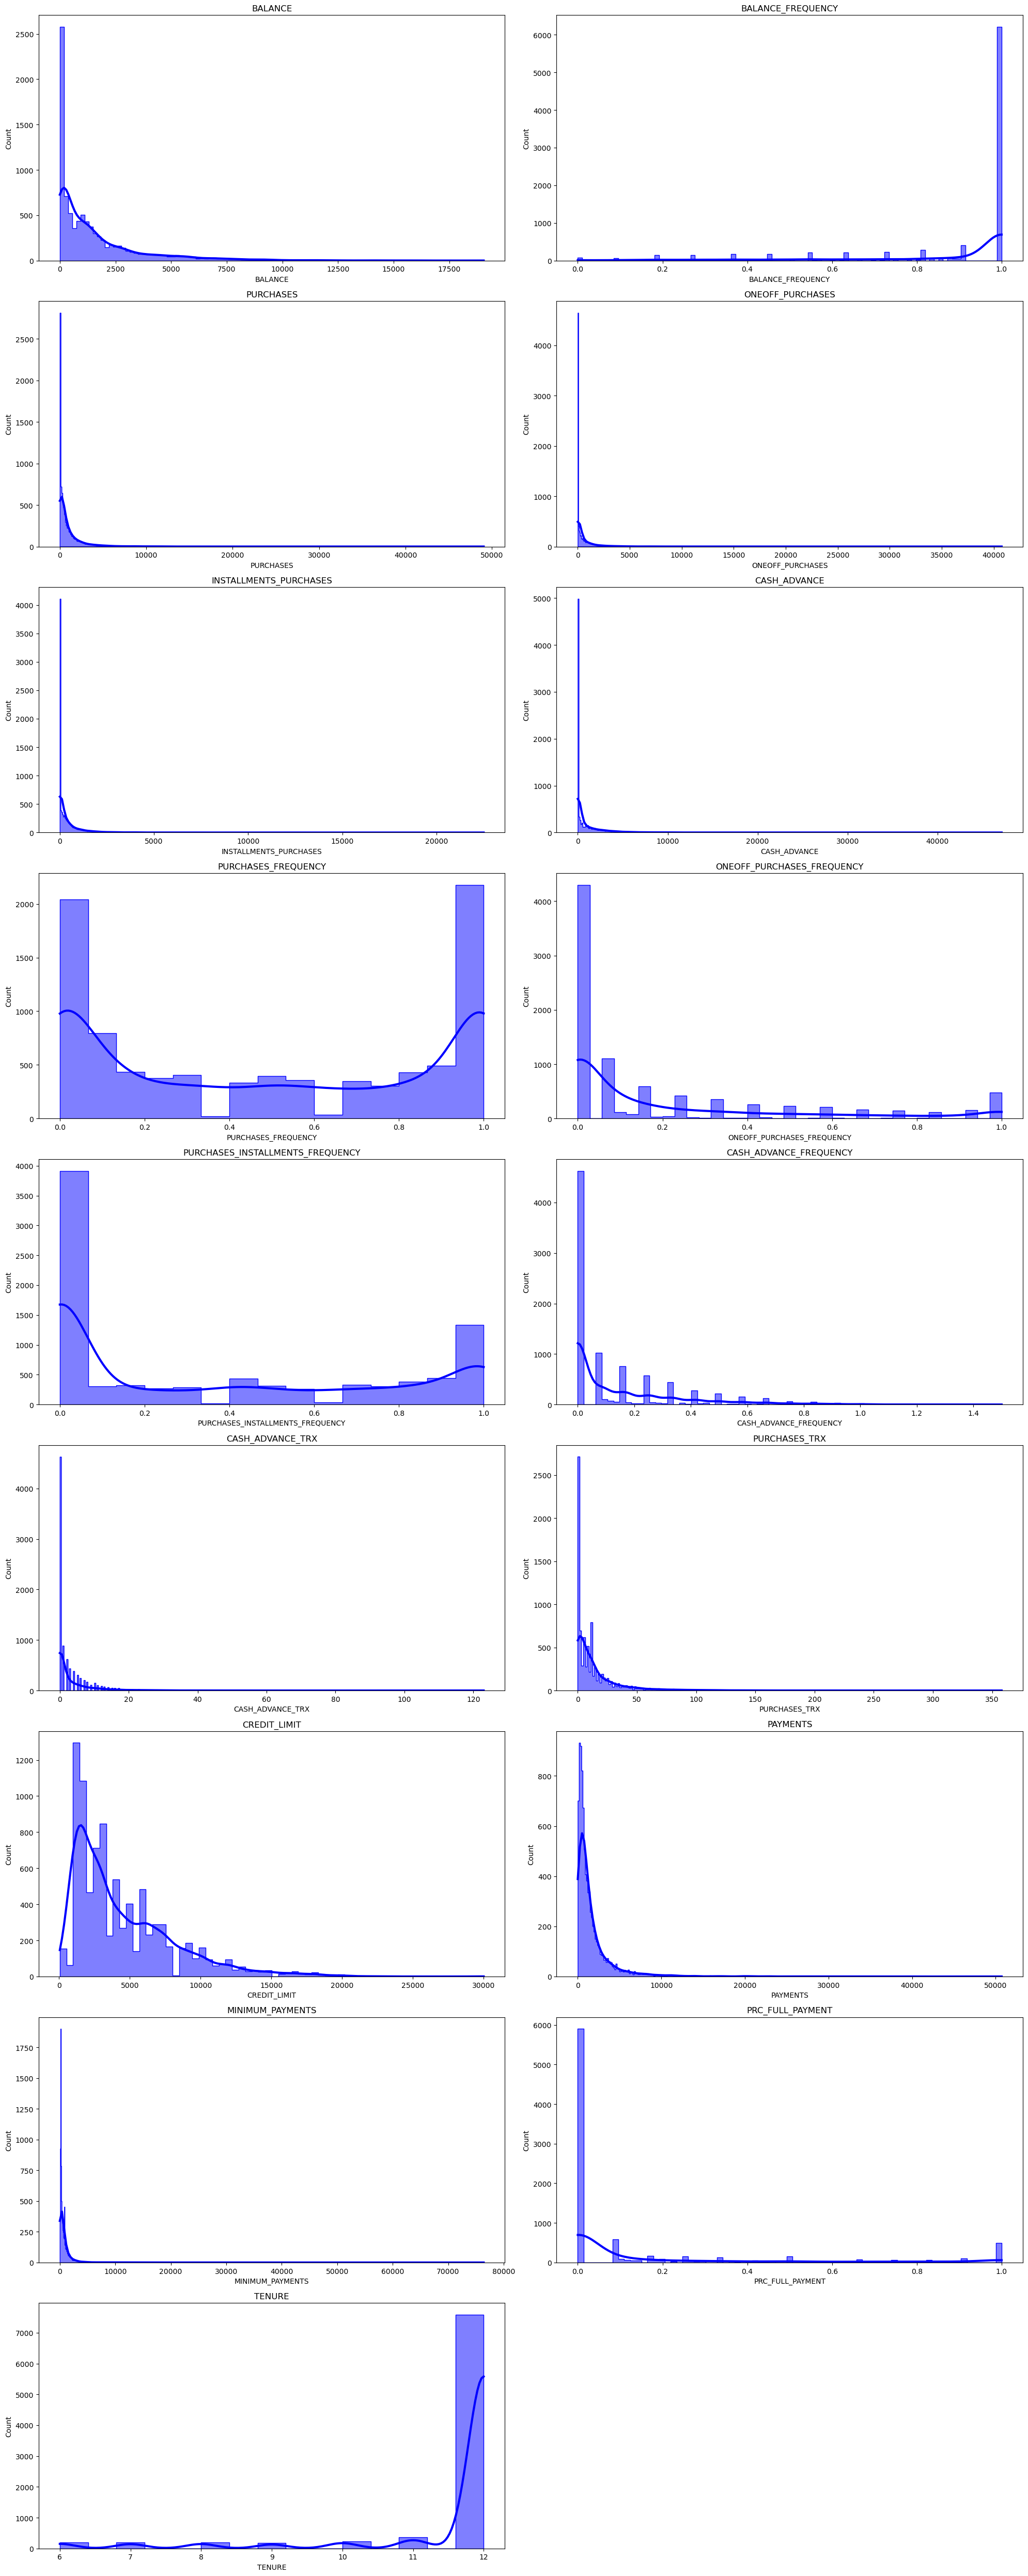

In [12]:
num_columns = len(df.columns)
n_rows = (num_columns + 1) // 2 

plt.figure(figsize=(20, 50))  

for i in range(num_columns):
    plt.subplot(n_rows, 2, i + 1)  
    sns.histplot(df[df.columns[i]], kde=True, element="step", 
                 line_kws={"color": "r", "lw": 3, "label": "KDE"}, 
                 color="b")
    plt.title(df.columns[i])

plt.tight_layout()
plt.show()

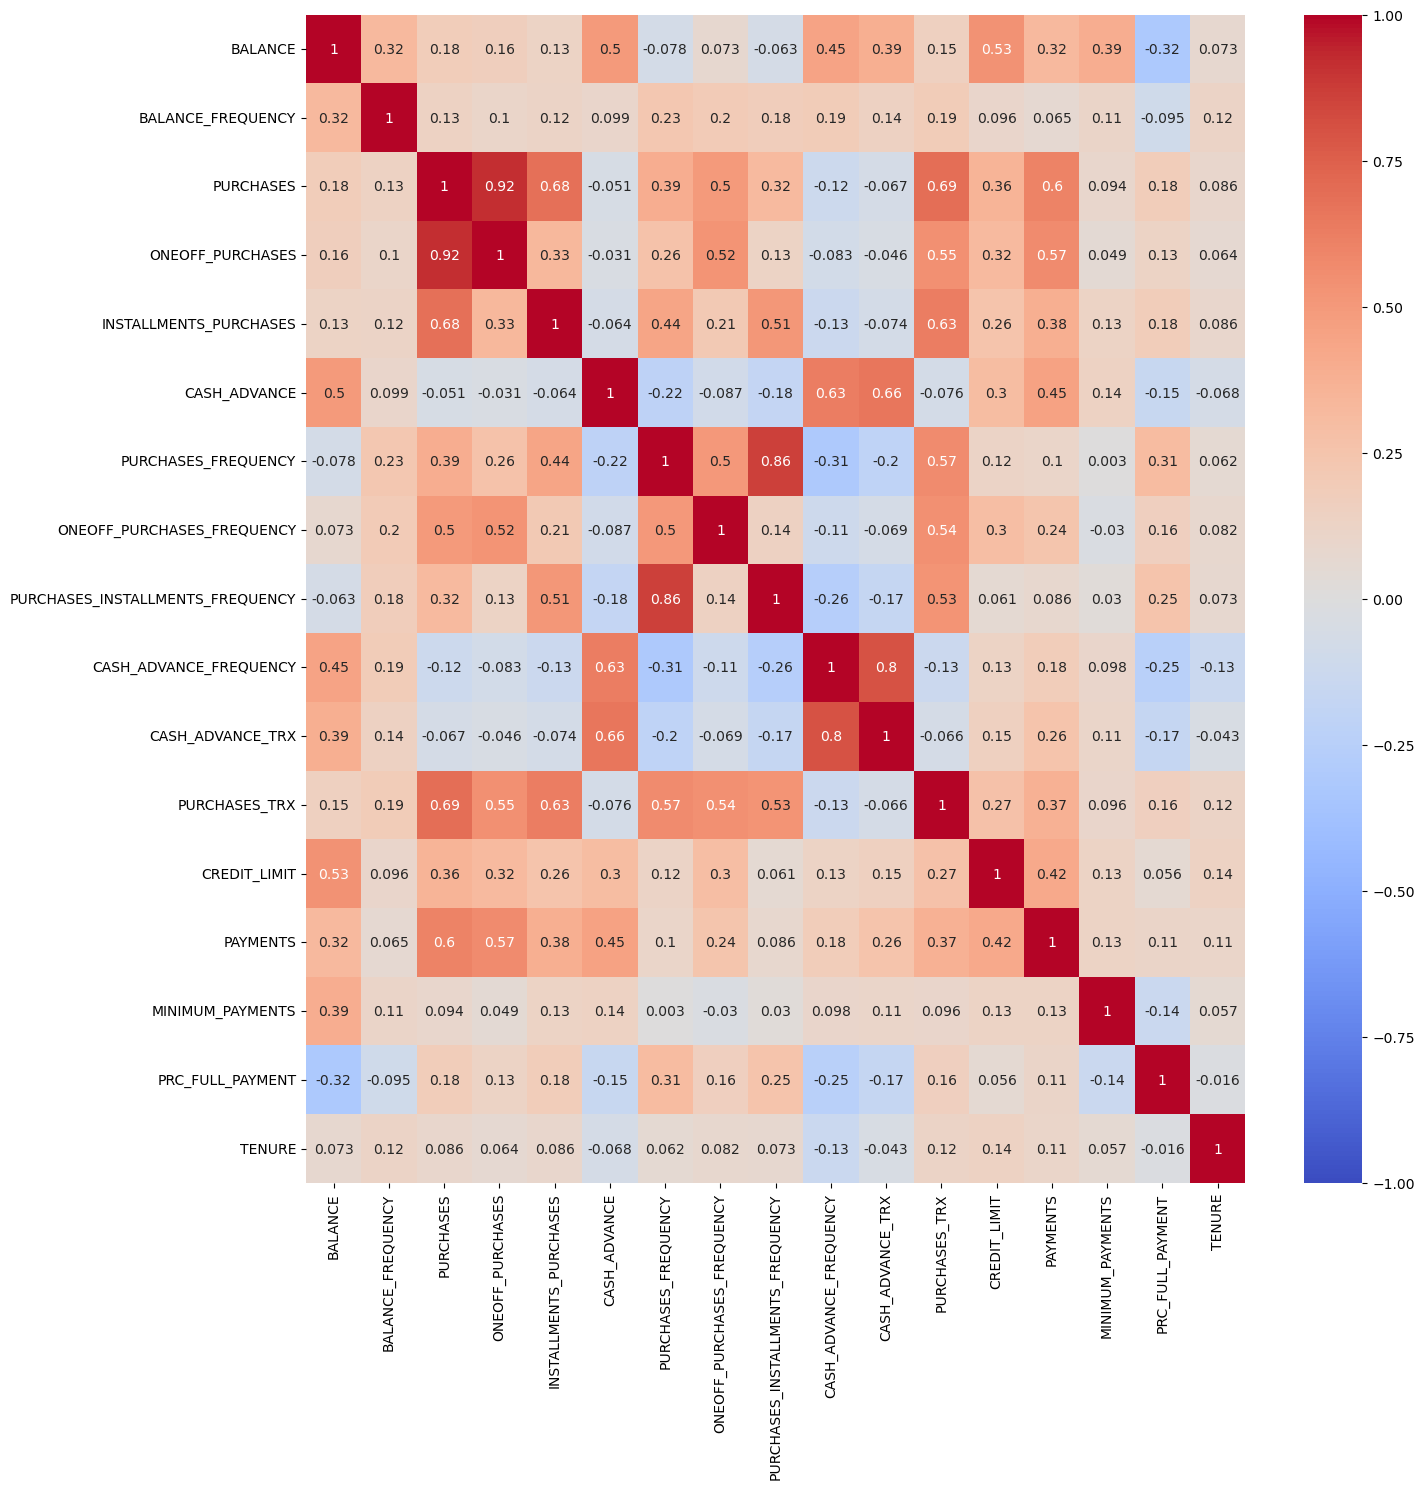

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(numeric_only = True), annot = True, vmin = -1, vmax =1, cmap = 'coolwarm')
plt.tight_layout()
plt.show();

In [14]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [15]:
# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [188]:
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled_df.index = df.index
df_scaled_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960433   
1                   0.573963          0.110074      -0.591796      0.688639   
2                  -0.675349         -0.476070      -0.109020      0.826062   
3                  -0.258913         -0.329534      -0.551565      0.826062   
4                  -0.675349         -0.476070      -0.551565     -0.905464   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960433   
8946               -0.675349         -0.476070      -0.350408     -0.960433   
8947               -0.675349         -0.476070      -0.390639     -0.960433   
8948                0.157527         -0.182998      -0.591796     -1.097856   
8949                0.990398         -0.182998       0.333524     -0.905464   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979     -3.109675e-01         -0.525551  0.360680  
1     0.818642      8.931021e-02          0.234227  0.360680  
2    -0.383805     -1.016632e-01         -0.525551  0.360680  
3    -0.598688      4.878305e-17         -0.525551  0.360680  
4    -0.364368     -2.657913e-01         -0.525551  0.360680  
...        ...               ...               ...       ...  
8945 -0.486217     -3.498541e-01          1.183951 -4.122768  
8946 -0.503396      4.878305e-17         -0.525551 -4.122768  
8947 -0.570615     -3.354655e-01          0.329200 -

In [16]:
# Confirming assumptions for PCA 

In [17]:
# Confirming the statistical significance of correlations 
# Reject H0 if p-value < 0.05
chi_square_value, p_value = calculate_bartlett_sphericity(df)
p_value

0.0

In [18]:
# Above 0.7 is good, below 0.5 is not acceptable
kmo_all, kmo_model = calculate_kmo(df)
kmo_model

0.6402814057746039

In [19]:
df_pca = df.copy()

In [20]:
pca = PCA(n_components = 10, random_state = 42)
pca_transformed = pca.fit_transform(df_pca)

In [21]:
pca.explained_variance_

array([2.08758952e+07, 7.80885212e+06, 6.13926875e+06, 4.99032544e+06,
       2.11653706e+06, 1.19758662e+06, 7.93520211e+05, 2.91713755e+02,
       3.16252316e+01, 2.58224967e+01])

In [22]:
# Checking the explained variance for each PC
pca.explained_variance_ratio_

array([4.75291089e-01, 1.77787721e-01, 1.39775550e-01, 1.13617030e-01,
       4.81881708e-02, 2.72660042e-02, 1.80664389e-02, 6.64158097e-06,
       7.20026164e-07, 5.87912636e-07])

In [23]:
# Creating a dataframe containing the coefficiants of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], 
                                     index = df_pca.columns)

In [24]:
df_extracted_loadings

PC1       PC2       PC3           PC4  \
BALANCE                           0.291521 -0.300680  0.275067  5.501016e-02   
BALANCE_FREQUENCY                 0.000008 -0.000004  0.000011  8.689398e-06   
PURCHASES                         0.292697  0.500842 -0.096841  2.958107e-01   
ONEOFF_PURCHASES                  0.210847  0.380378 -0.077554  1.871296e-01   
INSTALLMENTS_PURCHASES            0.081844  0.120505 -0.019314  1.086963e-01   
CASH_ADVANCE                      0.216284 -0.204398  0.403132 -5.601571e-01   
PURCHASES_FREQUENCY               0.000013  0.000037 -0.000031  4.450286e-05   
ONEOFF_PURCHASES_FREQUENCY        0.000023  0.000028 -0.000028  2.420561e-05   
PURCHASES_INSTALLMENTS_FREQUENCY  0.000008  0.000030 -0.000018  3.701913e-05   
CASH_ADVANCE_FREQUENCY            0.000010 -0.000019  0.000029 -3.221918e-05   
CASH_ADVANCE_TRX                  0.000405 -0.000504  0.001002 -1.156603e-03   
PURCHASES_TRX                     0.002341  0.003517 -0.000982  3.079884e-03   
CREDIT_LIMIT                      0.690109 -0.447353 -0.506821  8.703088e-02   
PAYMENTS                          0.487428  0.470278  0.296923 -3.590256e-01   
MINIMUM_PAYMENTS                  0.132541 -0.190953  0.633265  6.421658e-01   
PRC_FULL_PAYMENT                  0.000002  0.000026 -0.000028  4.908607e-07   
TENURE                            0.000039  0.000003 -0.000027  5.120099e-05   

                                       PC5       PC6       PC7       PC8  \
BALANCE                           0.722615 -0.472758 -0.015678 -0.000581   
BALANCE_FREQUENCY                 0.000045 -0.000015  0.000018  0.001521   
PURCHASES                         0.287338  0.269957  0.278753 -0.007413   
ONEOFF_PURCHASES                  0.277231  0.305625 -0.515781  0.001545   
INSTALLMENTS_PURCHASES            0.010034 -0.035755  0.795052 -0.006443   
CASH_ADVANCE                      0.134442  0.634200  0.121907  0.000454   
PURCHASES_FREQUENCY              -0.000005  0.000014  0.000121  0.008192   
ONEOFF_PURCHASES_FREQUENCY        0.000021  0.000032 -0.000037  0.005838   
PURCHASES_INSTALLMENTS_FREQUENCY -0.000010 -0.000008  0.000188  0.007502   
CASH_ADVANCE_FREQUENCY            0.000034  0.000021 -0.000003 -0.000389   
CASH_ADVANCE_TRX                  0.000704  0.001101  0.000165  0.003766   
PURCHASES_TRX                     0.002253  0.000947  0.007953  0.999847   
CREDIT_LIMIT                     -0.231212  0.072606 -0.021269 -0.000187   
PAYMENTS                         -0.367873 -0.427206 -0.079713  0.000470   
MINIMUM_PAYMENTS                 -0.333821  0.137657 -0.046720 -0.000001   
PRC_FULL_PAYMENT                 -0.000056  0.000026  0.000030  0.000802   
TENURE                           -0.000064 -0.000178 -0.000005  0.005637   

                                       PC9      PC10  
BALANCE                           0.000026 -0.000466  
BALANCE_FREQUENCY                -0.000207  0.002921  
PURCHASES                        -0.577405 -0.002911  
ONEOFF_PURCHASES                  0.577511  0.002915  
INSTALLMENTS_PURCHASES            0.577109  0.003064  
CASH_ADVANCE                      0.000028 -0.002057  
PURCHASES_FREQUENCY              -0.000406 -0.004234  
ONEOFF_PURCHASES_FREQUENCY       -0.000656  0.000721  
PURCHASES_INSTALLMENTS_FREQUENCY -0.000357 -0.003811  
CASH_ADVANCE_FREQUENCY           -0.000052  0.018948  
CASH_ADVANCE_TRX                 -0.005140  0.999772  
PURCHASES_TRX                    -0.001423 -0.003725  
CREDIT_LIMIT                      0.000003  0.000191  
PAYMENTS                         -0.000015  0.000068  
MINIMUM_PAYMENTS                  0.000016  0.000050  
PRC_FULL_PAYMENT                 -0.000186 -0.001541  
TENURE                           -0.000238  0.002924

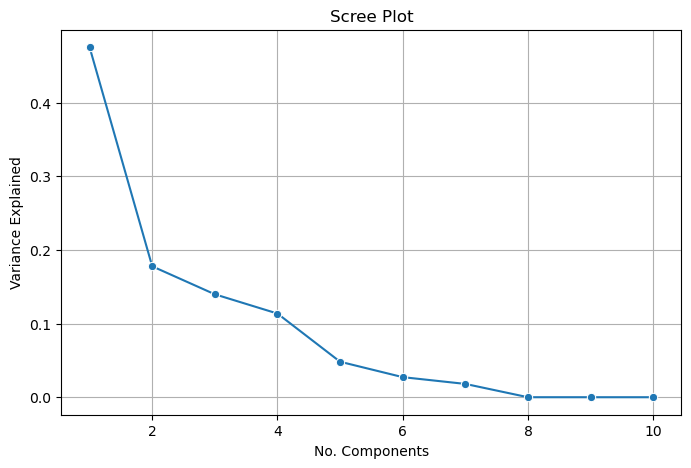

In [25]:
# Creating a scree plot 
plt.figure(figsize = (8,5))
sns.lineplot(y=pca.explained_variance_ratio_, x = range(1,11), marker = 'o')
plt.xlabel('No. Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid()
plt.show();

In [26]:
# Checking the cumilative explained variance ratio to find a cut off point for selecting the no. PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.47529109, 0.65307881, 0.79285436, 0.90647139, 0.95465956,
       0.98192556, 0.999992  , 0.99999865, 0.99999937, 0.99999995])

Based on the results above, the decision will be to use 5 components. It retains a high percentage of the variance while keeping the dimensionality relatively low. This typically ensures that the clustering algorithm works efficiently and the results are interpretable.

In [28]:
# Choosing the PCs based on the cum sum 
df_selected = df_extracted_loadings[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
df_selected

PC1       PC2       PC3           PC4  \
BALANCE                           0.291521 -0.300680  0.275067  5.501016e-02   
BALANCE_FREQUENCY                 0.000008 -0.000004  0.000011  8.689398e-06   
PURCHASES                         0.292697  0.500842 -0.096841  2.958107e-01   
ONEOFF_PURCHASES                  0.210847  0.380378 -0.077554  1.871296e-01   
INSTALLMENTS_PURCHASES            0.081844  0.120505 -0.019314  1.086963e-01   
CASH_ADVANCE                      0.216284 -0.204398  0.403132 -5.601571e-01   
PURCHASES_FREQUENCY               0.000013  0.000037 -0.000031  4.450286e-05   
ONEOFF_PURCHASES_FREQUENCY        0.000023  0.000028 -0.000028  2.420561e-05   
PURCHASES_INSTALLMENTS_FREQUENCY  0.000008  0.000030 -0.000018  3.701913e-05   
CASH_ADVANCE_FREQUENCY            0.000010 -0.000019  0.000029 -3.221918e-05   
CASH_ADVANCE_TRX                  0.000405 -0.000504  0.001002 -1.156603e-03   
PURCHASES_TRX                     0.002341  0.003517 -0.000982  3.079884e-03   
CREDIT_LIMIT                      0.690109 -0.447353 -0.506821  8.703088e-02   
PAYMENTS                          0.487428  0.470278  0.296923 -3.590256e-01   
MINIMUM_PAYMENTS                  0.132541 -0.190953  0.633265  6.421658e-01   
PRC_FULL_PAYMENT                  0.000002  0.000026 -0.000028  4.908607e-07   
TENURE                            0.000039  0.000003 -0.000027  5.120099e-05   

                                       PC5  
BALANCE                           0.722615  
BALANCE_FREQUENCY                 0.000045  
PURCHASES                         0.287338  
ONEOFF_PURCHASES                  0.277231  
INSTALLMENTS_PURCHASES            0.010034  
CASH_ADVANCE                      0.134442  
PURCHASES_FREQUENCY              -0.000005  
ONEOFF_PURCHASES_FREQUENCY        0.000021  
PURCHASES_INSTALLMENTS_FREQUENCY -0.000010  
CASH_ADVANCE_FREQUENCY            0.000034  
CASH_ADVANCE_TRX                  0.000704  
PURCHASES_TRX                     0.002253  
CREDIT_LIMIT                     -0.231212  
PAYMENTS                         -0.367873  
MINIMUM_PAYMENTS                 -0.333821  
PRC_FULL_PAYMENT                 -0.000056  
TENURE                           -0.000064

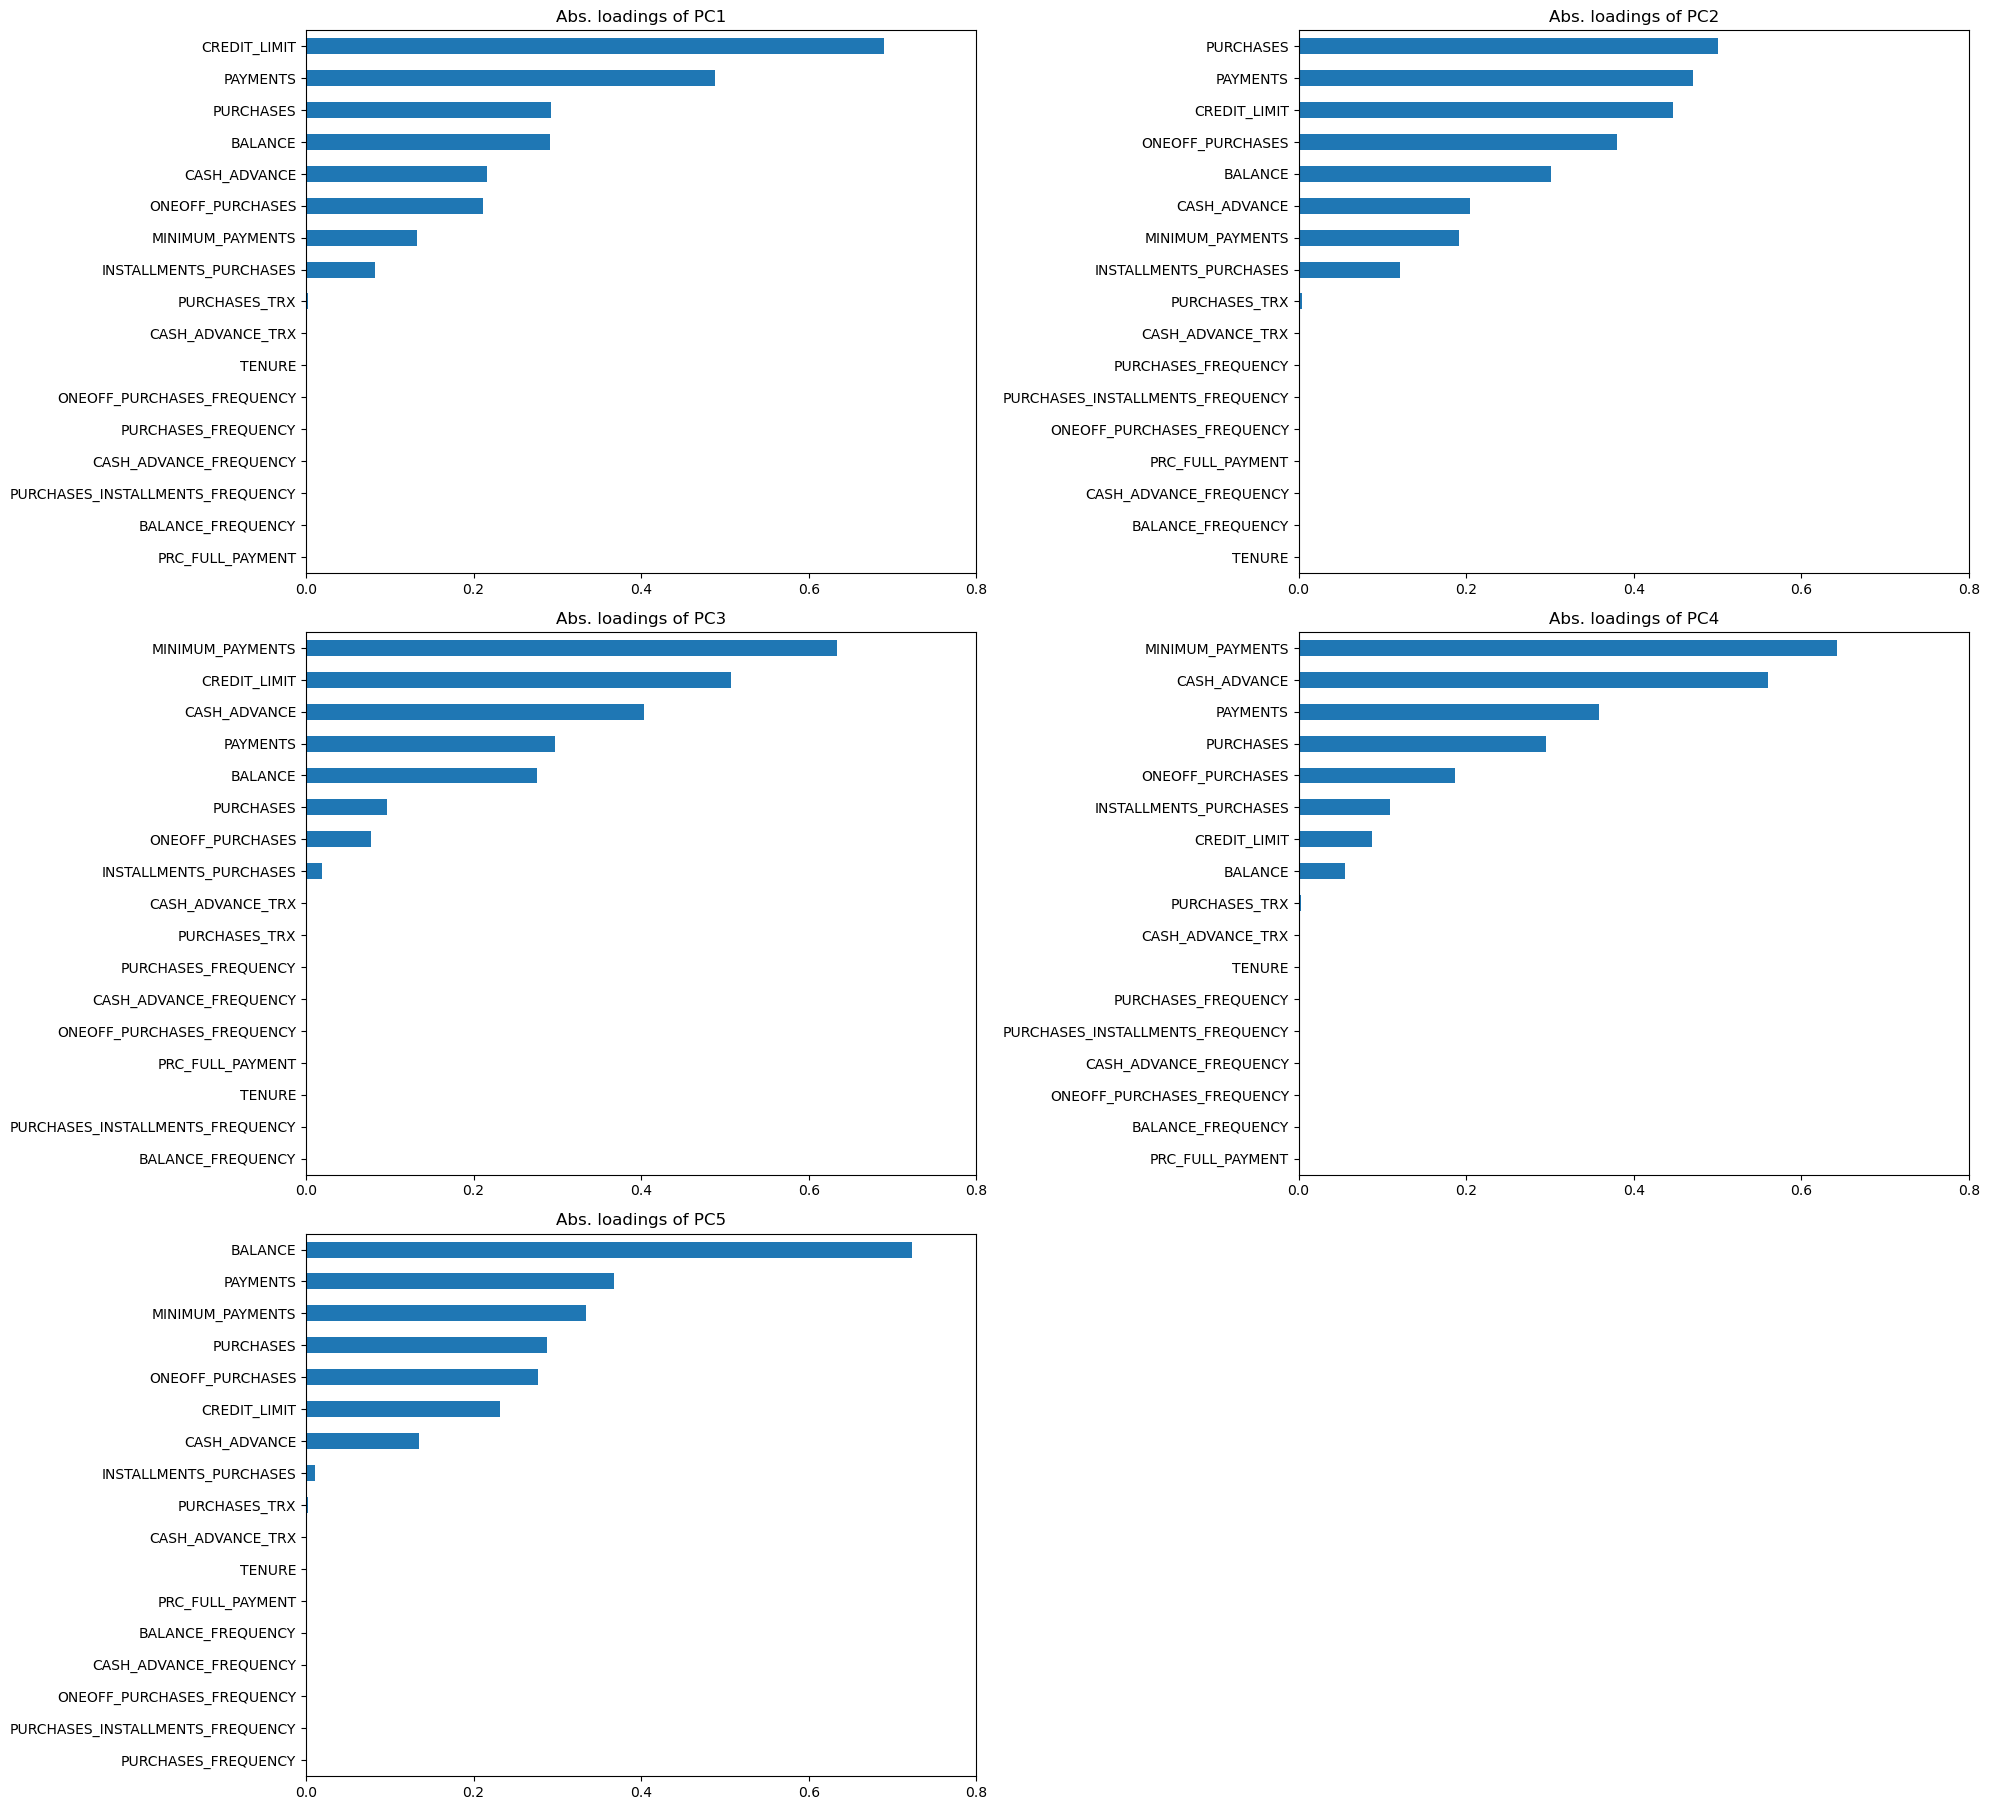

In [29]:
# Checking the feature importance for each PC

plt.figure(figsize = (20,30))
for i in range(len(df_selected.columns)):
    plt.subplot(5,2, i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = True).plot.barh()
    plt.xticks(np.arange(0,1,0.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

<Axes: >

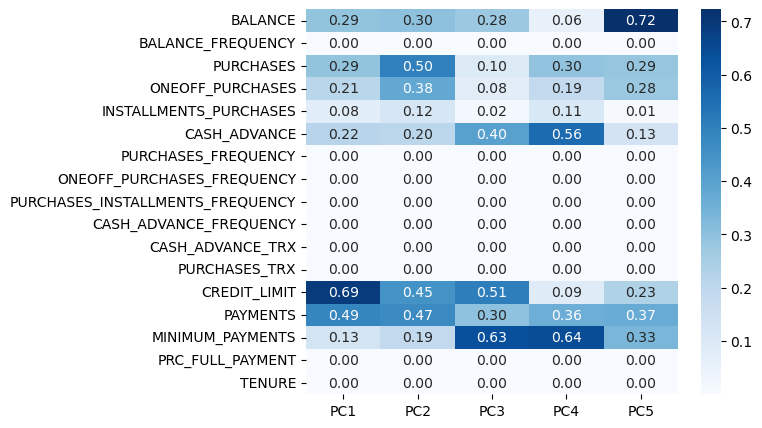

In [30]:
# Comparing how the original features influence various PCs

plt.figure(figsize = (6,5))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues', fmt = '0.2f')

In [31]:
pca_new = PCA(n_components = 5, random_state = 42)
pca_final = pca_new.fit_transform(df_pca)

In [32]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df

PC1          PC2          PC3          PC4         PC5
0    -4326.383956   921.566884   183.708365  -168.948265  -47.629700
1     4118.916676 -2432.846347  2369.969306 -3922.117128  -59.029537
2     1497.907660 -1997.578692 -2125.631345  1028.943565  313.696195
3     1394.548556 -1488.743450 -2431.799668  1594.073673  302.200788
4    -3743.351874   757.342659   512.476474  -243.154764  237.678261
...           ...          ...          ...          ...         ...
8945 -4208.357938  1122.443274   136.926040  -193.088492  -13.672106
8946 -4123.924001   951.683803   634.880178   351.417575 -271.634627
8947 -4379.444202   911.504566   101.257199  -143.469554   17.699898
8948 -4791.117744  1032.540944   358.038359  -273.249504  107.553195
8949 -3623.702749  1555.134769   -28.368008   301.876829  819.970802

[8950 rows x 5 columns]

Further reducing the dimensions to two, to visualise the data that we have

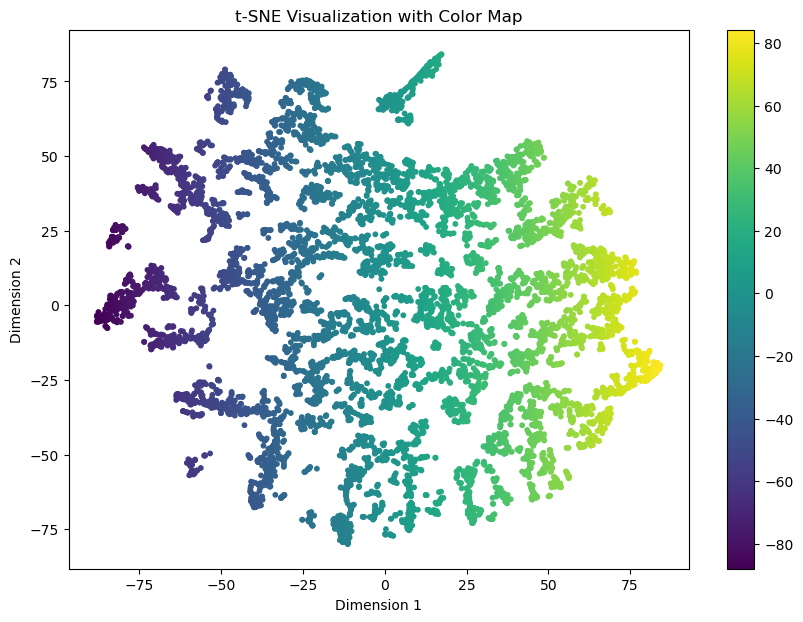

In [47]:
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(pca_final)

# Create DataFrame for plotting
df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Plot t-SNE result with color map
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=df_tsne['Dimension 1'], cmap='viridis', s=10)
plt.colorbar(scatter)
plt.title('t-SNE Visualization with Color Map')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

**Note:** Currently, the colours are random, and just for visualsiation, they do not mean anything. We have not assigned any clusters.

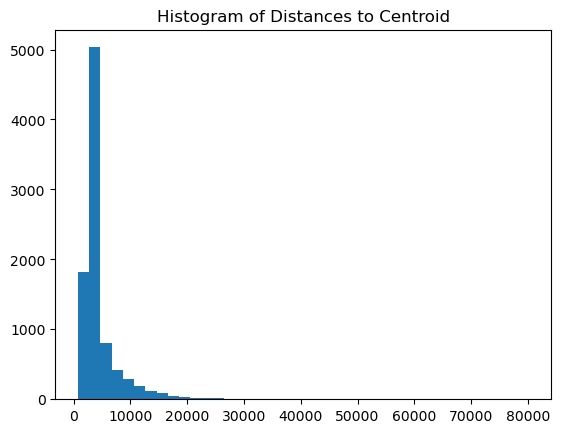

In [61]:
# Calculating the centroid of the data
centroid = np.mean(pca_final, axis=0)

# Computing the distances from each point to the centroid
distances = cdist(pca_final, [centroid])

plt.hist(distances, bins=40)
plt.title("Histogram of Distances to Centroid")
plt.show()

The distance from the centroid on the overall dataset suggests that our data is more elliptical than spherical. Therefore, in terms of identifying clusters using the Gaussian Mixture Model would be a more appropriate approach. 

For the purpose of this project, we will experiment with both Kmeans and GMM. 

### Finding Optimal n = k with KMeans

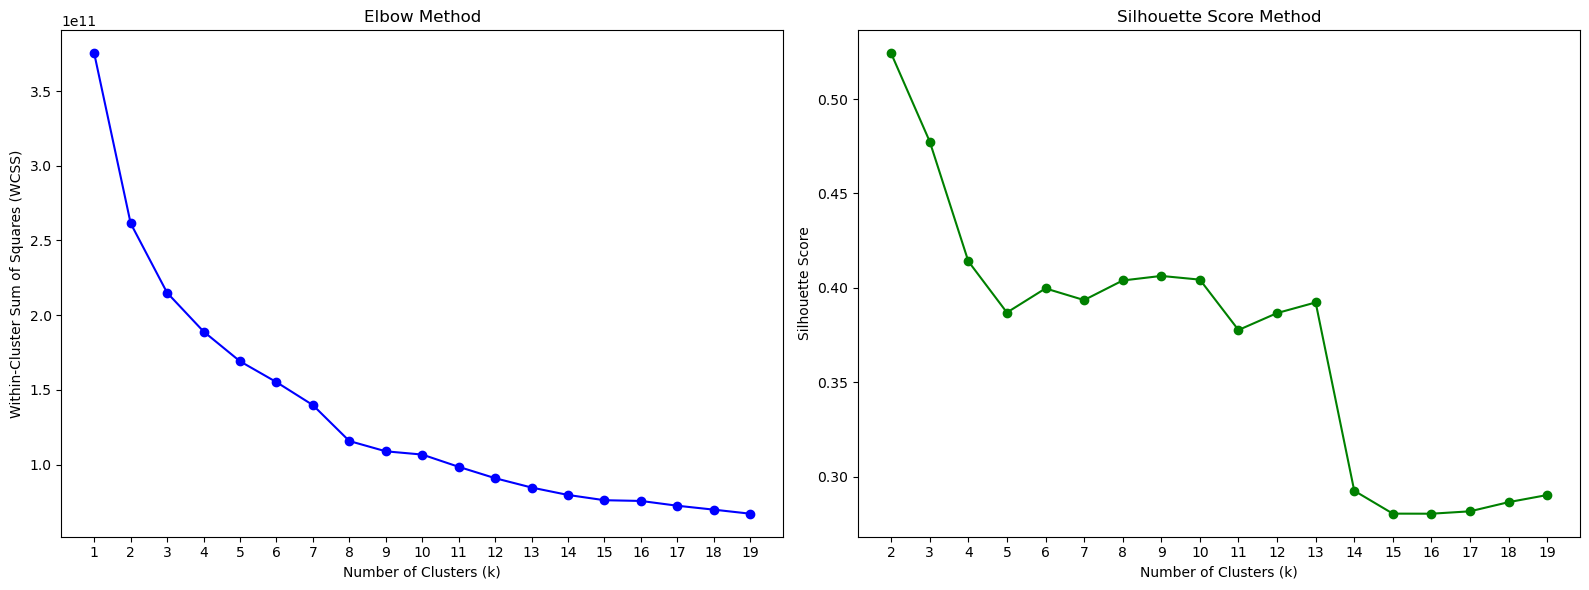

In [156]:
k_range = range(1, 20)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_final)
    
    inertia.append(kmeans.inertia_)
    
    if k >= 2:
        labels = kmeans.labels_
        score = silhouette_score(pca_final, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None) 

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(k_range, inertia, marker='o', color='b')
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Within-Cluster Sum of Squares (WCSS)')
axs[0].set_xticks(range(min(k_range), max(k_range) + 1, 1))

axs[1].plot(range(2, 20), [score for score in silhouette_scores if score is not None], marker='o', color='g')  
axs[1].set_title('Silhouette Score Method')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].set_xticks(range(2, 20))

plt.tight_layout()
plt.show()

**Elbow Method:** We can see that significant drops in inertia are observed around k=7 and k=8, with diminishing returns thereafter. This suggests that 7 or 8 clusters might capture the majority of the data's variance. 

**Silhouette Score:** The highest silhouette score occurs at k =2, indicating the best-defined clusters, however, 2 clusters are too broad for nuanced customer segmentation. The scores seem to stablilize aroun k=8 and k=9, and demonstrate reasonably well seperated clusters. 

Considering both methods **k = 8** appears to be the most balanced decision, as it provides a good trade-off between cluster granularity and quality. It captures sufficient complexity in the data (as suggested by the Elbow Method) while maintaining a decent Silhouette Score.

Let's reduce the dimensions to two, and visualise the data better using various n = k. 

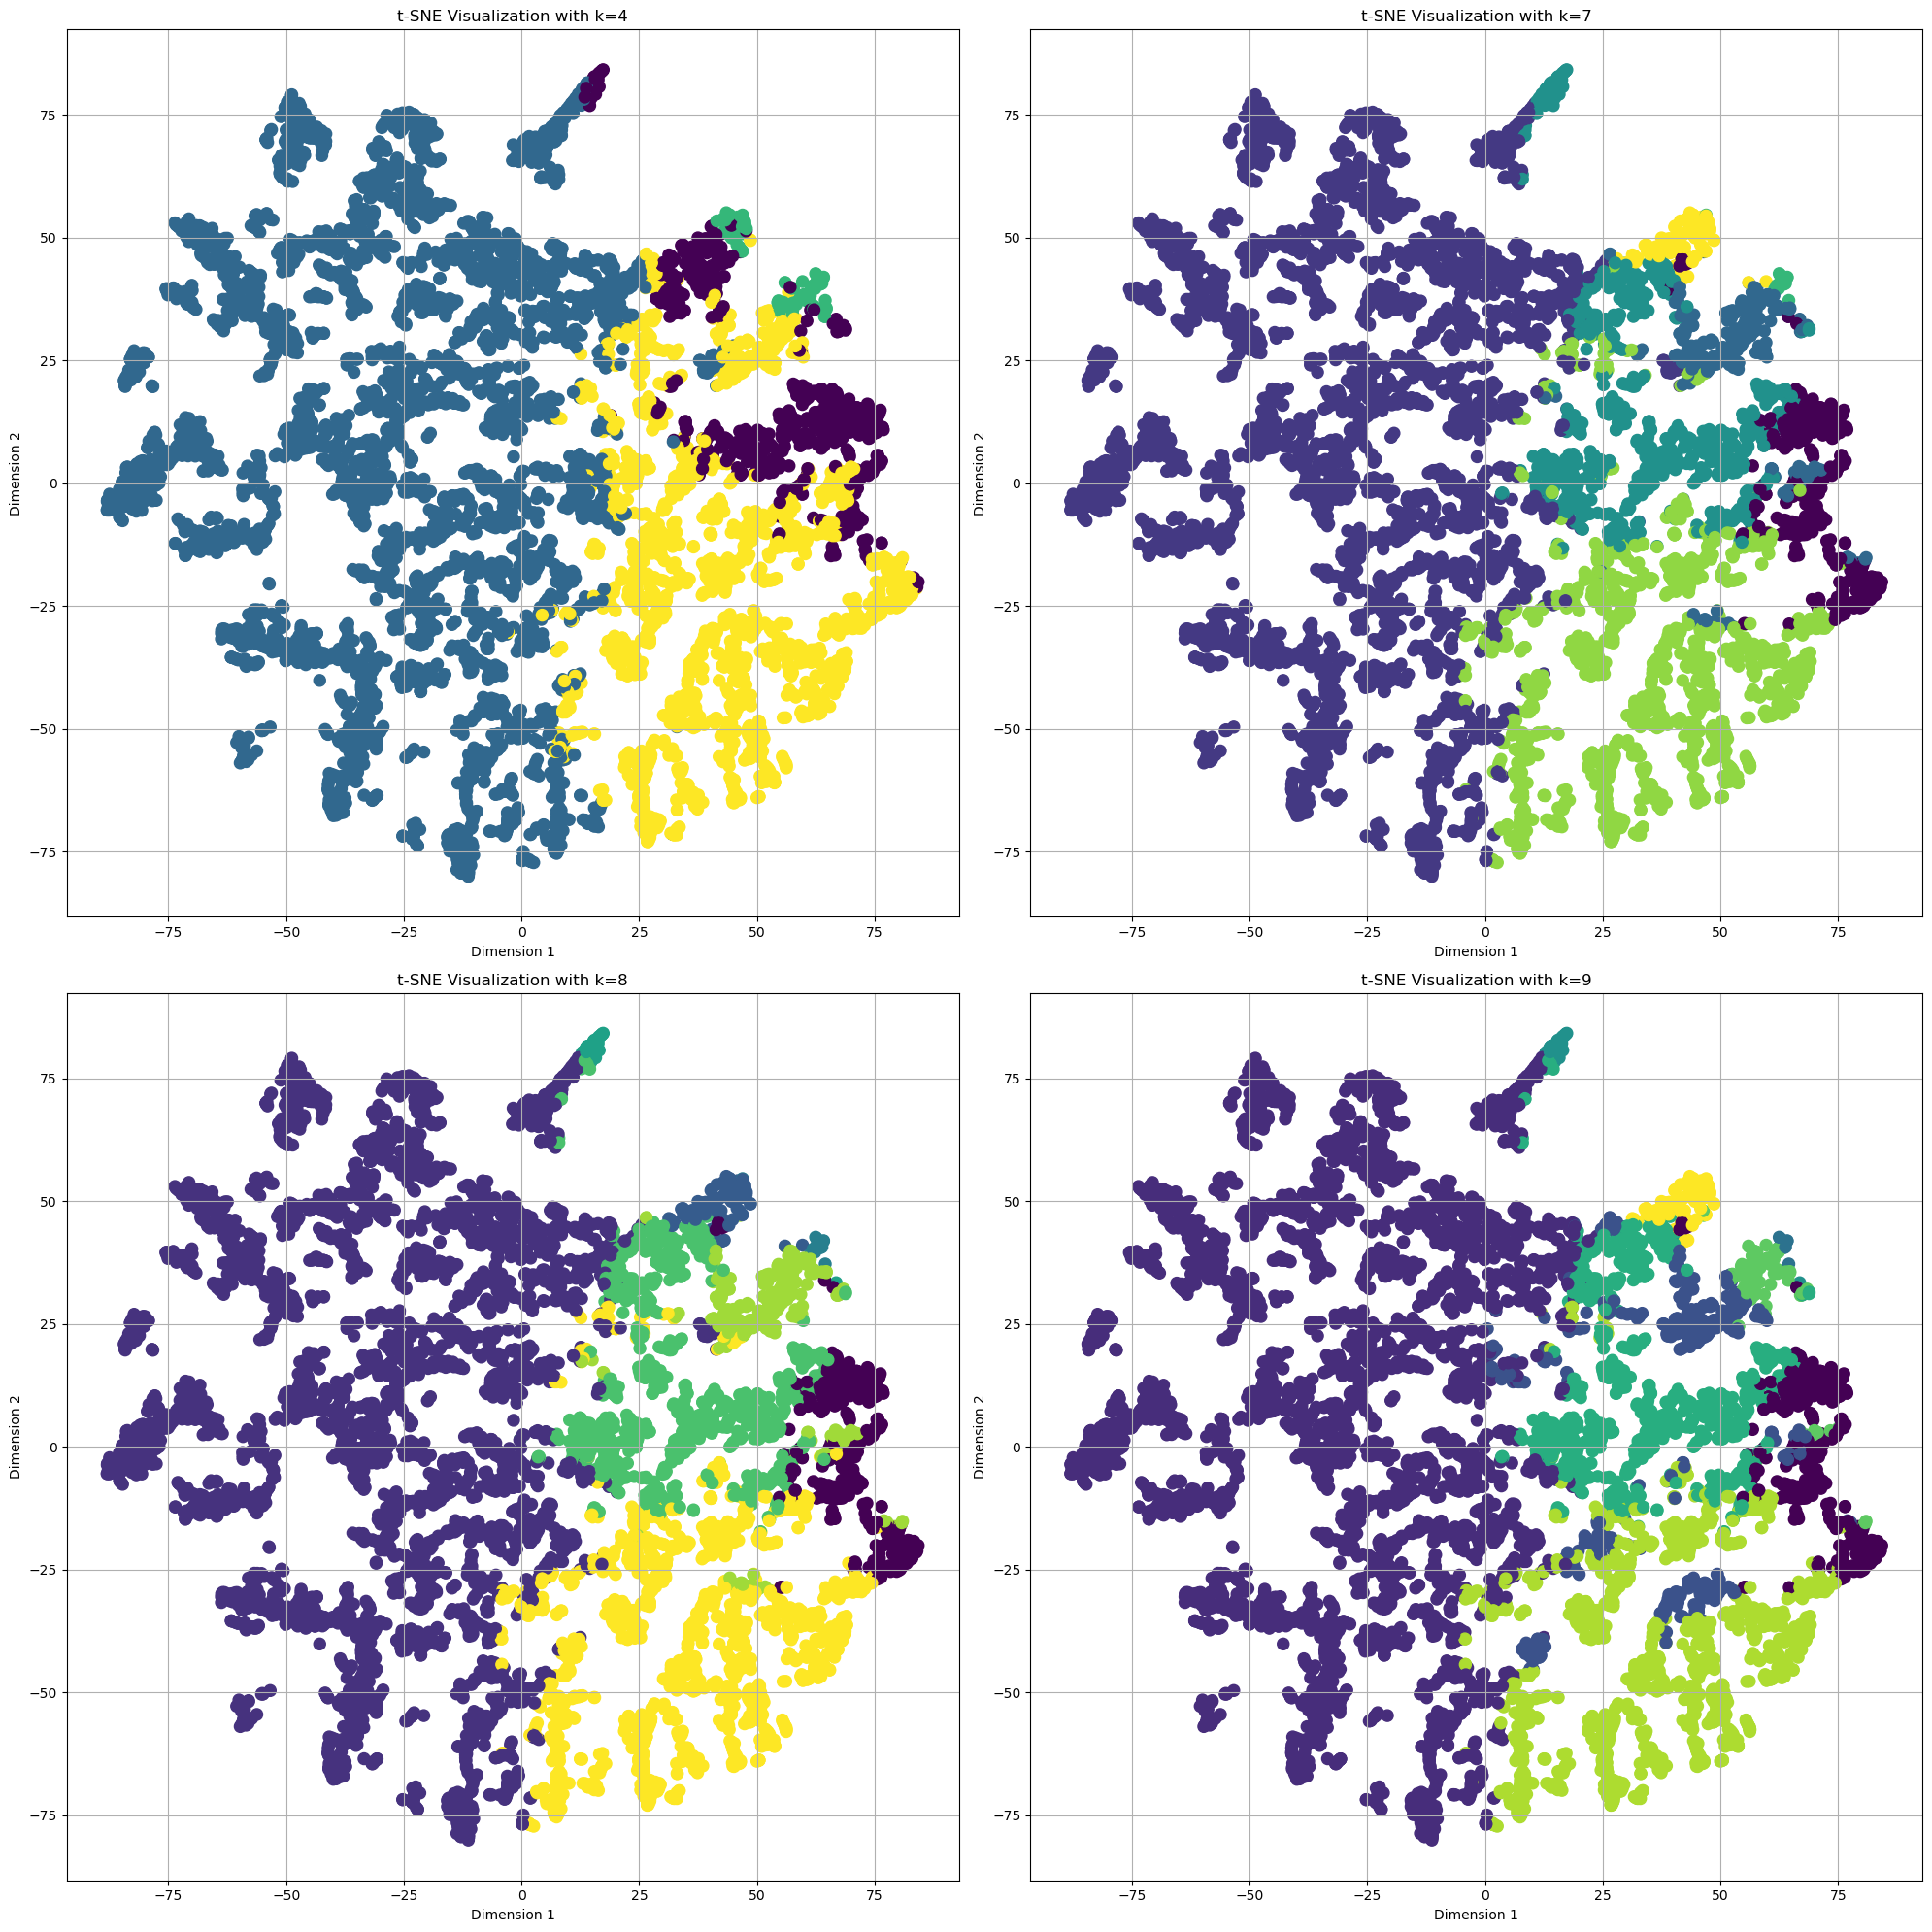

In [158]:
k_values = [4, 7, 8, 9] 

num_plots = len(k_values)
num_cols = 2  
num_rows = (num_plots + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10 * num_rows), tight_layout=True)
axes = axes.flatten()

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(pca_final)
    
    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster'] = cluster_labels

    scatter = axes[idx].scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=df_tsne['Cluster'], s=75)
    axes[idx].set_title(f't-SNE Visualization with k={k}')
    axes[idx].set_xlabel('Dimension 1')
    axes[idx].set_ylabel('Dimension 2')
    axes[idx].grid(True)

for ax in axes[num_plots:]:
    ax.axis('off')

plt.show()

To get a better understaing of how this relates to the data that we have let's analyse how these different k values sort our data

In [309]:
def compute_cluster_centroids(df, n_components=5, n_clusters=n_clusters, random_state=42):
    
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    pca = PCA(n_components=n_components)  # Number of PCA components
    pca_final = pca.fit_transform(df_scaled)

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=random_state)
    cluster_labels = kmeans.fit_predict(pca_final)

    df_pca = pd.DataFrame(pca_final, columns=[f'PC{i+1}' for i in range(n_components)])
    df_pca['Cluster Labels'] = cluster_labels

    df_unscaled = scaler.inverse_transform(df_scaled)  
    df_unscaled = pd.DataFrame(df_unscaled, columns=df.columns)
    combined_df = pd.concat([df_unscaled, df_pca], axis=1)

    cluster_centroids_pca = kmeans.cluster_centers_

    cluster_centroids_scaled = pca.inverse_transform(cluster_centroids_pca)
    cluster_centroids_original = scaler.inverse_transform(cluster_centroids_scaled)

    df_cluster_centroids = pd.DataFrame(cluster_centroids_original, columns=df.columns)

    df_centroids_pca = pd.DataFrame(cluster_centroids_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    df_cluster_centroids = pd.concat([df_cluster_centroids, df_centroids_pca], axis=1)

    df_cluster_centroids['Cluster Label'] = range(n_clusters)

    return combined_df, df_cluster_centroids

In [311]:
combined_df, df_cluster_centroids = compute_cluster_centroids(df, n_components=5, n_clusters=4)
df_cluster_centroids

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  4234.917895           0.990616   570.871913        317.866568   
1   888.288659           0.945645  1289.073797        522.826224   
2  3343.771775           0.986952  7057.232526       4863.969300   
3  1092.415367           0.773673   200.627420        239.290435   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              253.063041   4441.084659             0.247010   
1              766.763622     68.594458             0.834032   
2             2193.795617   1108.695982             1.067541   
3              -38.492235    646.483222             0.216453   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.115386                          0.172700   
1                    0.280278                          0.702113   
2                    0.769111                          0.790011   
3                    0.099783                          0.097164   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.475521  ...  3719.942668       1956.350437   
1                0.054880  ...  1056.818836        569.541736   
2                0.046791  ...  7702.537912       1883.988833   
3                0.106609  ...   986.091233        652.185342   

   PRC_FULL_PAYMENT     TENURE       PC1       PC2       PC3       PC4  \
0         -0.019948  11.222220 -0.546991  3.452445  0.398640 -0.427487   
1          0.255702  11.531683  0.936625 -1.123076  0.741750 -0.280184   
2          0.349858  12.290046  6.190859  0.704577 -0.937861  0.324646   
3          0.100729  11.506739 -1.316843 -0.221431 -0.622167  0.323527   

        PC5  Cluster Label  
0 -0.021059              0  
1  0.108862              1  
2 -0.054202              2  
3 -0.076525              3  

[4 rows x 23 columns]

In [283]:
combined_df, df_cluster_centroids = compute_cluster_centroids(df, n_components=5, n_clusters=5)
df_cluster_centroids

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  4425.798759           0.999323   641.558044        350.032972   
1   987.368893           0.967253  1435.726871        629.042923   
2  3611.472883           0.969944  7718.508817       5328.239662   
3  1793.210985           0.894557    91.257287        206.617075   
4  -168.572761           0.556527   546.362601        288.494385   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              291.583546   4827.175061             0.254252   
1              807.193015     67.109304             0.865907   
2             2390.837347   1245.125857             1.079560   
3             -115.310983    845.893472             0.256130   
4              258.347118    410.339619             0.216928   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.117106                          0.184355   
1                    0.307739                          0.723979   
2                    0.800459                          0.800328   
3                    0.160180                          0.106170   
4                   -0.014201                          0.170969   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.511351  ...  4057.773556       1953.123050   
1                0.056360  ...  1145.317657        589.966258   
2                0.040514  ...  8540.981889       2154.263852   
3                0.149869  ...   724.566522        949.207846   
4                0.033113  ...  1682.084021        193.036874   

   PRC_FULL_PAYMENT     TENURE       PC1       PC2       PC3       PC4  \
0         -0.012424  11.127605 -0.455827  3.766392  0.439632 -0.608846   
1          0.253251  11.576739  1.136661 -1.086141  0.795719 -0.254283   
2          0.366905  12.363788  6.759344  0.902513 -1.168328  0.396136   
3          0.008831  11.753823 -1.201903  0.240348 -0.171014  0.627144   
4          0.302381  10.981743 -1.242005 -1.063176 -1.269595 -0.424775   

        PC5  Cluster Label  
0 -0.031908              0  
1  0.182753              1  
2 -0.218554              2  
3  0.338246              3  
4 -0.966766              4  

[5 rows x 23 columns]

In [285]:
combined_df, df_cluster_centroids = compute_cluster_centroids(df, n_components=5, n_clusters=6)
df_cluster_centroids

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0  4430.837650           0.997905    616.937314        336.632488   
1   834.831136           0.947688   1049.603942        297.419500   
2  2526.925145           1.029418   5001.968255       3415.737930   
3  1801.438676           0.896162    107.677315        230.128650   
4  -148.107659           0.549224    553.625047        316.464384   
5  6902.583023           0.507589  20685.829791      15020.963937   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              280.359071   4861.710425             0.247511   
1              752.728058     55.174035             0.843109   
2             1586.660245    606.781987             1.012902   
3             -122.411151    849.485180             0.253822   
4              237.626024    427.770961             0.193780   
5             5665.852117   3789.273249             1.169903   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.114121                          0.178259   
1                    0.251971                          0.726266   
2                    0.659620                          0.746552   
3                    0.164894                          0.100687   
4                   -0.017117                          0.146836   
5                    1.540541                          0.725377   

   CASH_ADVANCE_FREQUENCY  ...      PAYMENTS  MINIMUM_PAYMENTS  \
0                0.514976  ...   4063.154052       1941.259085   
1                0.056096  ...    792.651481        621.870027   
2                0.055200  ...   5075.532309       1174.002597   
3                0.150830  ...    740.204060        929.694979   
4                0.033626  ...   1728.715062        206.071348   
5               -0.065575  ...  25105.890887       4300.767287   

   PRC_FULL_PAYMENT     TENURE        PC1       PC2       PC3       PC4  \
0         -0.013249  11.114683  -0.490377  3.794332  0.431422 -0.623128   
1          0.253849  11.503703   0.771963 -1.189637  0.903653 -0.317464   
2          0.289138  12.110728   4.389962  0.049376 -0.257867  0.205778   
3          0.007438  11.757473  -1.194405  0.253828 -0.188511  0.632773   
4          0.297108  10.990163  -1.288188 -1.023725 -1.343735 -0.389541   
5          0.878002  12.943735  17.207211  4.188042 -7.193217  0.578059   

        PC5  Cluster Label  
0 -0.031684              0  
1  0.056369              1  
2  0.384864              2  
3  0.360191              3  
4 -0.976107              4  
5 -2.546091              5  

[6 rows x 23 columns]

In [287]:
combined_df, df_cluster_centroids = compute_cluster_centroids(df, n_components=5, n_clusters=7)
df_cluster_centroids

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0  4416.313485           0.997179    605.714664        333.661543   
1   691.066623           0.907526    685.243836       -158.188959   
2  3817.382306           1.005623   6736.338857       4322.005857   
3  1782.325721           0.891573     58.236987        183.669079   
4  -136.709855           0.544835    547.709176        327.875651   
5  6749.522091           0.456266  22324.988742      16888.536073   
6  1427.966783           1.042766   2747.538302       2060.111810   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              272.104137   4856.972299             0.245137   
1              844.119435    122.322424             0.855062   
2             2415.042489   1296.627342             1.128460   
3             -125.383839    858.398680             0.249767   
4              220.288893    435.943862             0.177948   
5             5437.059402   3592.356864             0.983099   
6              687.601398     21.928609             0.830762   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.114241                          0.175015   
1                    0.154090                          0.798793   
2                    0.665708                          0.930874   
3                    0.155197                          0.101493   
4                   -0.019484                          0.130304   
5                    1.793598                          0.368743   
6                    0.566139                          0.537381   

   CASH_ADVANCE_FREQUENCY  ...      PAYMENTS  MINIMUM_PAYMENTS  \
0                0.514994  ...   4049.577478       1920.323529   
1                0.051008  ...    573.434879        926.481188   
2                0.051809  ...   7491.533960       2929.639525   
3                0.151101  ...    708.768712        943.134551   
4                0.033978  ...   1744.922582        212.861876   
5               -0.087480  ...  26788.969413       3021.174713   
6                0.067465  ...   2267.088593       -105.240624   

   PRC_FULL_PAYMENT     TENURE        PC1       PC2       PC3       PC4  \
0         -0.013073  11.110302  -0.506944  3.788334  0.422814 -0.627074   
1          0.279107  11.382459   0.512792 -1.331091  1.154706 -0.478715   
2          0.319440  12.405433   6.184583  0.839398 -0.260713  0.470293   
3          0.008588  11.743320  -1.243638  0.245173 -0.177130  0.618640   
4          0.292894  10.996308  -1.328325 -1.000199 -1.389126 -0.364310   
5          0.894598  13.058176  17.947253  4.449496 -9.001864  0.836100   
6          0.212152  11.867414   2.085022 -0.615513 -0.051515  0.116107   

        PC5  Cluster Label  
0 -0.023605              0  
1 -0.359301              1  
2 -0.559124              2  
3  0.329230              3  
4 -0.979126              4  
5 -1.756697              5  
6  1.099857              6  

[7 rows x 23 columns]

In [289]:
combined_df, df_cluster_centroids = compute_cluster_centroids(df, n_components=5, n_clusters=8)
df_cluster_centroids

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0  5300.903551           1.020291   1515.155719         90.478863   
1   545.166640           0.896895    653.153010       -168.501661   
2  4245.344786           0.990490    538.603494        343.002196   
3  -127.726789           0.540349    561.652607        348.101899   
4  2943.289817           1.011824   6288.894164       4256.971019   
5  7073.887528           0.498065  20918.819996      15183.092071   
6  1324.269410           1.041974   2455.743555       1878.757267   
7  1739.146139           0.888801     29.178030        171.984976   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             1425.399754   2081.813489             0.576422   
1              822.341437     92.556958             0.852695   
2              195.616104   4984.578185             0.232292   
3              214.001208    432.920897             0.166716   
4             2032.464239    861.370813             1.103764   
5             5736.725674   3903.292895             1.158721   
6              577.131881    -40.602229             0.800219   
7             -142.763894    870.353035             0.245526   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.024395                          0.678411   
1                    0.153388                          0.794129   
2                    0.124957                          0.149523   
3                   -0.020900                          0.118801   
4                    0.730182                          0.836294   
5                    1.543430                          0.718004   
6                    0.548154                          0.506884   
7                    0.154558                          0.095936   

   CASH_ADVANCE_FREQUENCY  ...      PAYMENTS  MINIMUM_PAYMENTS  \
0                0.166567  ...   2952.975089       6262.466025   
1                0.048943  ...    537.550171        765.806388   
2                0.533054  ...   4078.330264       1533.242582   
3                0.032634  ...   1772.559226        229.170096   
4                0.044671  ...   6633.824963       1584.615008   
5               -0.063481  ...  25468.180822       4482.560132   
6                0.068752  ...   1924.983908       -202.369896   
7                0.153258  ...    692.642408        874.813057   

   PRC_FULL_PAYMENT     TENURE        PC1       PC2       PC3       PC4  \
0         -0.135180  12.814683   1.239949  1.862890  1.847013  1.898600   
1          0.293170  11.324004   0.458729 -1.408332  1.099714 -0.563016   
2          0.006783  10.965839  -0.623960  3.826131  0.315568 -0.847959   
3          0.290448  11.005654  -1.342593 -0.989092 -1.430197 -0.338457   
4          0.347366  12.187839   5.637858  0.326062 -0.526681  0.174630   
5          0.877301  12.979928  17.383257  4.337003 -7.291225  0.632178   
6          0.198154  11.850385   1.777284 -0.677439 -0.027377  0.134668   
7          0.012047  11.716648  -1.283565  0.239265 -0.196557  0.581702   

        PC5  Cluster Label  
0 -1.753110              0  
1 -0.343925              1  
2  0.098291              2  
3 -0.990002              3  
4  0.090870              4  
5 -2.644453              5  
6  1.159193              6  
7  0.344838              7  

[8 rows x 23 columns]

In [291]:
combined_df, df_cluster_centroids = compute_cluster_centroids(df, n_components=5, n_clusters=9)
df_cluster_centroids

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0  5074.545950           1.025490   1570.999147        159.148287   
1   487.881135           0.889893    655.601343       -173.874875   
2  2966.306631           0.930370     69.248460        118.859265   
3  -144.357051           0.532815    568.440660        366.663745   
4  3105.839358           1.006741   6690.018427       4547.698377   
5  7073.887528           0.498065  20918.819996      15183.092071   
6  1353.589072           1.044848   2634.985960       1980.360753   
7  1522.946096           0.885611    102.679811        227.275082   
8  5709.932619           1.048237   1192.222587        656.346003   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             1412.563068   2036.224704             0.612610   
1              830.173836     68.469419             0.854365   
2              -49.600896   3144.077200             0.203767   
3              202.222107    427.844822             0.152660   
4             2142.874453    907.274323             1.113891   
5             5736.725674   3903.292895             1.158721   
6              654.796405    -33.569345             0.831711   
7             -124.535690    460.865429             0.272979   
8              535.926130   7144.126516             0.274326   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.006230                          0.697184   
1                    0.149711                          0.797991   
2                    0.116538                          0.093819   
3                   -0.023401                          0.104356   
4                    0.755272                          0.841482   
5                    1.543430                          0.718004   
6                    0.561630                          0.538101   
7                    0.170725                          0.114605   
8                    0.131658                          0.228918   

   CASH_ADVANCE_FREQUENCY  ...      PAYMENTS  MINIMUM_PAYMENTS  \
0                0.167858  ...   2935.086044       5881.425235   
1                0.045305  ...    537.645818        740.516228   
2                0.367189  ...   2352.960517       1076.459690   
3                0.031026  ...   1798.443279        218.726531   
4                0.038959  ...   7100.495665       1735.534989   
5               -0.063481  ...  25468.180822       4482.560132   
6                0.065536  ...   2100.592583       -166.877511   
7                0.113891  ...    460.018058        830.872353   
8                0.722192  ...   6239.355123       2092.290250   

   PRC_FULL_PAYMENT     TENURE        PC1       PC2       PC3       PC4  \
0         -0.105316  12.715803   1.326087  1.738477  1.816183  1.703217   
1          0.300441  11.306214   0.456134 -1.454142  1.083035 -0.588777   
2          0.010032  11.228121  -1.208439  2.173075  0.042780 -0.276343   
3          0.290297  11.003796  -1.373188 -0.988239 -1.487931 -0.326348   
4          0.354234  12.250426   5.989637  0.428008 -0.658655  0.242957   
5          0.877301  12.979928  17.383257  4.337003 -7.291225  0.632178   
6          0.211236  11.855389   1.991349 -0.683602 -0.013112  0.103853   
7          0.019569  11.802799  -1.188885 -0.119073 -0.219597  0.709510   
8          0.017824  10.638140   0.154941  5.733119  0.596019 -1.557622   

        PC5  Cluster Label  
0 -1.608503              0  
1 -0.369496              1  
2  0.224807              2  
3 -1.001917              3  
4  0.025428              4  
5 -2.644453              5  
6  1.129996              6  
7  0.370631              7  
8 -0.129470              8  

[9 rows x 23 columns]

### Clustering Results Analysis

#### k = 4:

- **Cluster 0:** High balance and cash advances; moderate spending.
- **Cluster 1:** Low balance with high spending and low cash advances.
- **Cluster 2:** Very high spending with significant cash advances.
- **Cluster 3:** Low spending with low cash advances.

    - Four clusters provide a broad overview of customer segments. 
    - Suitable for general customer grouping with distinct spending patterns. 
    - Ideal for broad strategies or when a simpler segmentation is needed.

#### k = 5:

- **Cluster 0:** High balance, high cash advances, and significant spending.
- **Cluster 1:** Low balance, high spending, moderate cash advances.
- **Cluster 2:** Very high spending with high cash advances.
- **Cluster 3:** Moderate spending, low cash advances.
- **Cluster 4:** Low spending, minimal cash advances.

    - Introduces additional granularity compared to `k = 4`.
    - Separates out low activity and high activity more distinctly. 
    - Useful when needing slightly more detailed segmentation to refine strategies.

#### k = 6:

- **Cluster 0:** High balance, high spending, significant cash advances.
- **Cluster 1:** Low balance, moderate spending, some cash advances.
- **Cluster 2:** High spending with high cash advances.
- **Cluster 3:** Very low balance and low spending.
- **Cluster 4:** Low balance, significant spending, moderate cash advances.
- **Cluster 5:** Very high balance and spending with very high cash advances.

    - Provides even finer granularity than `k = 5`.
    - Distinguishes between moderate and very high spenders more clearly.
    - Better for detailed marketing strategies or customer profiling where fine distinctions are critical.

#### k = 7:

- **Cluster 0:** High balance with moderate cash advances and spending.
- **Cluster 1:** Low balance, high spending with low cash advances.
- **Cluster 2:** Moderate balance with high spending and cash advances.
- **Cluster 3:** Low balance with minimal spending and cash advances.
- **Cluster 4:** High balance with very high spending.
- **Cluster 5:** Very high spending with significant cash advances.
- **Cluster 6:** Low balance and minimal spending.

    - Adds further granularity by separating different levels of high spending and balance.
    - Provides detailed segments for highly specific customer needs.
    - Optimal for highly targeted marketing campaigns and detailed customer understanding.

#### k = 8:

- **Cluster 0:** High balance with significant cash advances.
- **Cluster 1:** Low balance, high spending, minimal cash advances.
- **Cluster 2:** Moderate balance with high spending.
- **Cluster 3:** Low balance and low spending.
- **Cluster 4:** Very high spending with high cash advances.
- **Cluster 5:** High balance and high spending.
- **Cluster 6:** Very low balance and minimal spending.
- **Cluster 7:** Low balance with moderate spending and cash advances.

    - Offers the most detailed segmentation, distinguishing between various levels of spending and balance.
    - High precision in capturing different customer behavior patterns.
    - Best suited for organizations requiring very detailed segments for specialized strategies or product offerings.

#### k = 9:

- **Cluster 0:** High balance with high cash advances.
- **Cluster 1:** Low balance, high spending, low cash advances.
- **Cluster 2:** Moderate spending with high cash advances.
- **Cluster 3:** Low balance with minimal spending and cash advances.
- **Cluster 4:** Very high spending and balance.
- **Cluster 5:** Moderate balance and high spending.
- **Cluster 6:** Very high cash advances with significant spending.
- **Cluster 7:** Low balance, moderate spending.
- **Cluster 8:** High balance with very high spending and cash advances.

    - Extremely detailed with nine distinct clusters.
    - Captures nuanced variations in spending and balance.
    - Ideal for highly segmented strategies where every nuance in customer behavior needs to be addressed.

### Summary and Recommendation

- **k = 4 and k = 5:** Good for general segmentation and broad strategies.
- **k = 6 and k = 7:** Offers a more detailed view, useful for refined targeting and specific insights.
- **k = 8 and k = 9:** Provides the highest level of detail, best for organizations needing very precise segmentation for tailored strategies.


### Finding Optimal n = k using GMM

BIC (Bayesian Information Criterion) and AIC (Akaike Information Criterion) are used to evaluate the goodness of fit of models while penalizing for complexity. Lower values indicate a better model in terms of fit and complexity balance.

BIC generally prefers simpler models compared to AIC because it penalizes for the number of parameters more heavily.

In [130]:
n_clusters_range = range(1, 20)
bic_scores = []
aic_scores = []

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, n_init=10, max_iter=1000, init_params='k-means++', random_state=42)
    gmm.fit(pca_final)
    bic_scores.append(gmm.bic(pca_final))
    aic_scores.append(gmm.aic(pca_final))

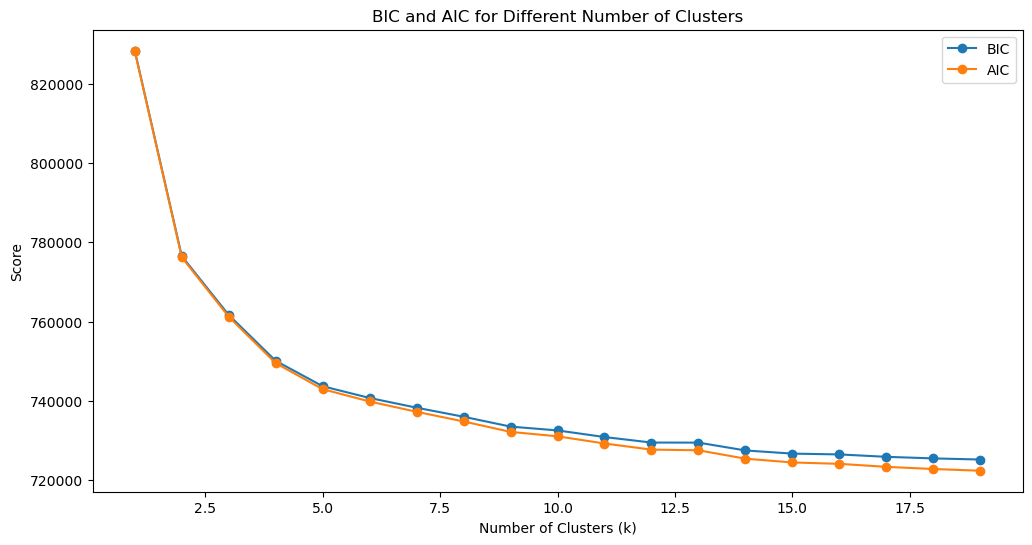

In [160]:
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, bic_scores, marker='o', label='BIC')
plt.plot(n_clusters_range, aic_scores, marker='o', label='AIC')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('BIC and AIC for Different Number of Clusters')
plt.legend()
plt.show()

In [162]:
results_df = pd.DataFrame({'Number of Clusters': n_clusters_range, 'BIC': bic_scores,  'AIC': aic_scores})
results_df

Number of Clusters            BIC            AIC
0                    1  828345.362721  828203.374545
1                    2  776508.597934  776217.522173
2                    3  761664.058985  761223.895639
3                    4  750089.827544  749500.576613
4                    5  743684.559485  742946.220969
5                    6  740723.328277  739835.902175
6                    7  738270.940482  737234.426795
7                    8  735988.460650  734802.859379
8                    9  733501.461754  732166.772897
9                   10  732537.556357  731053.779916
10                  11  730867.271793  729234.407767
11                  12  729477.619432  727695.667820
12                  13  729458.256979  727527.217782
13                  14  727485.337401  725405.210619
14                  15  726683.580989  724454.366623
15                  16  726481.843898  724103.541947
16                  17  725874.890531  723347.500995
17                  18  725478.050449  722801.573327
18                  19  725194.274965  722368.710259

BIC and AIC Values decrease as the number of clusters increases, up to a point. After that, they tend to level off or increase due to the penalty for adding more clusters.

The lowest BIC and AIC values are k = 19, indicating the best fit according to these criteria. However, this might overfit the model.
Having said that, k = 19 might be too complex and not practical. Therefore, let's consider a balance between fit and model simplicity.

Based on the BIC and AIC scores, k=8, k=9, or k=10 appear to be reasonable options, providing a good fit without excessive complexity. 

**k=8** is both reasonable according to silhouette scores and performs well in terms of BIC and AIC, it would be a practical choice. It offers a balance between fit and complexity and avoids overfitting while maintaining a good model fit.

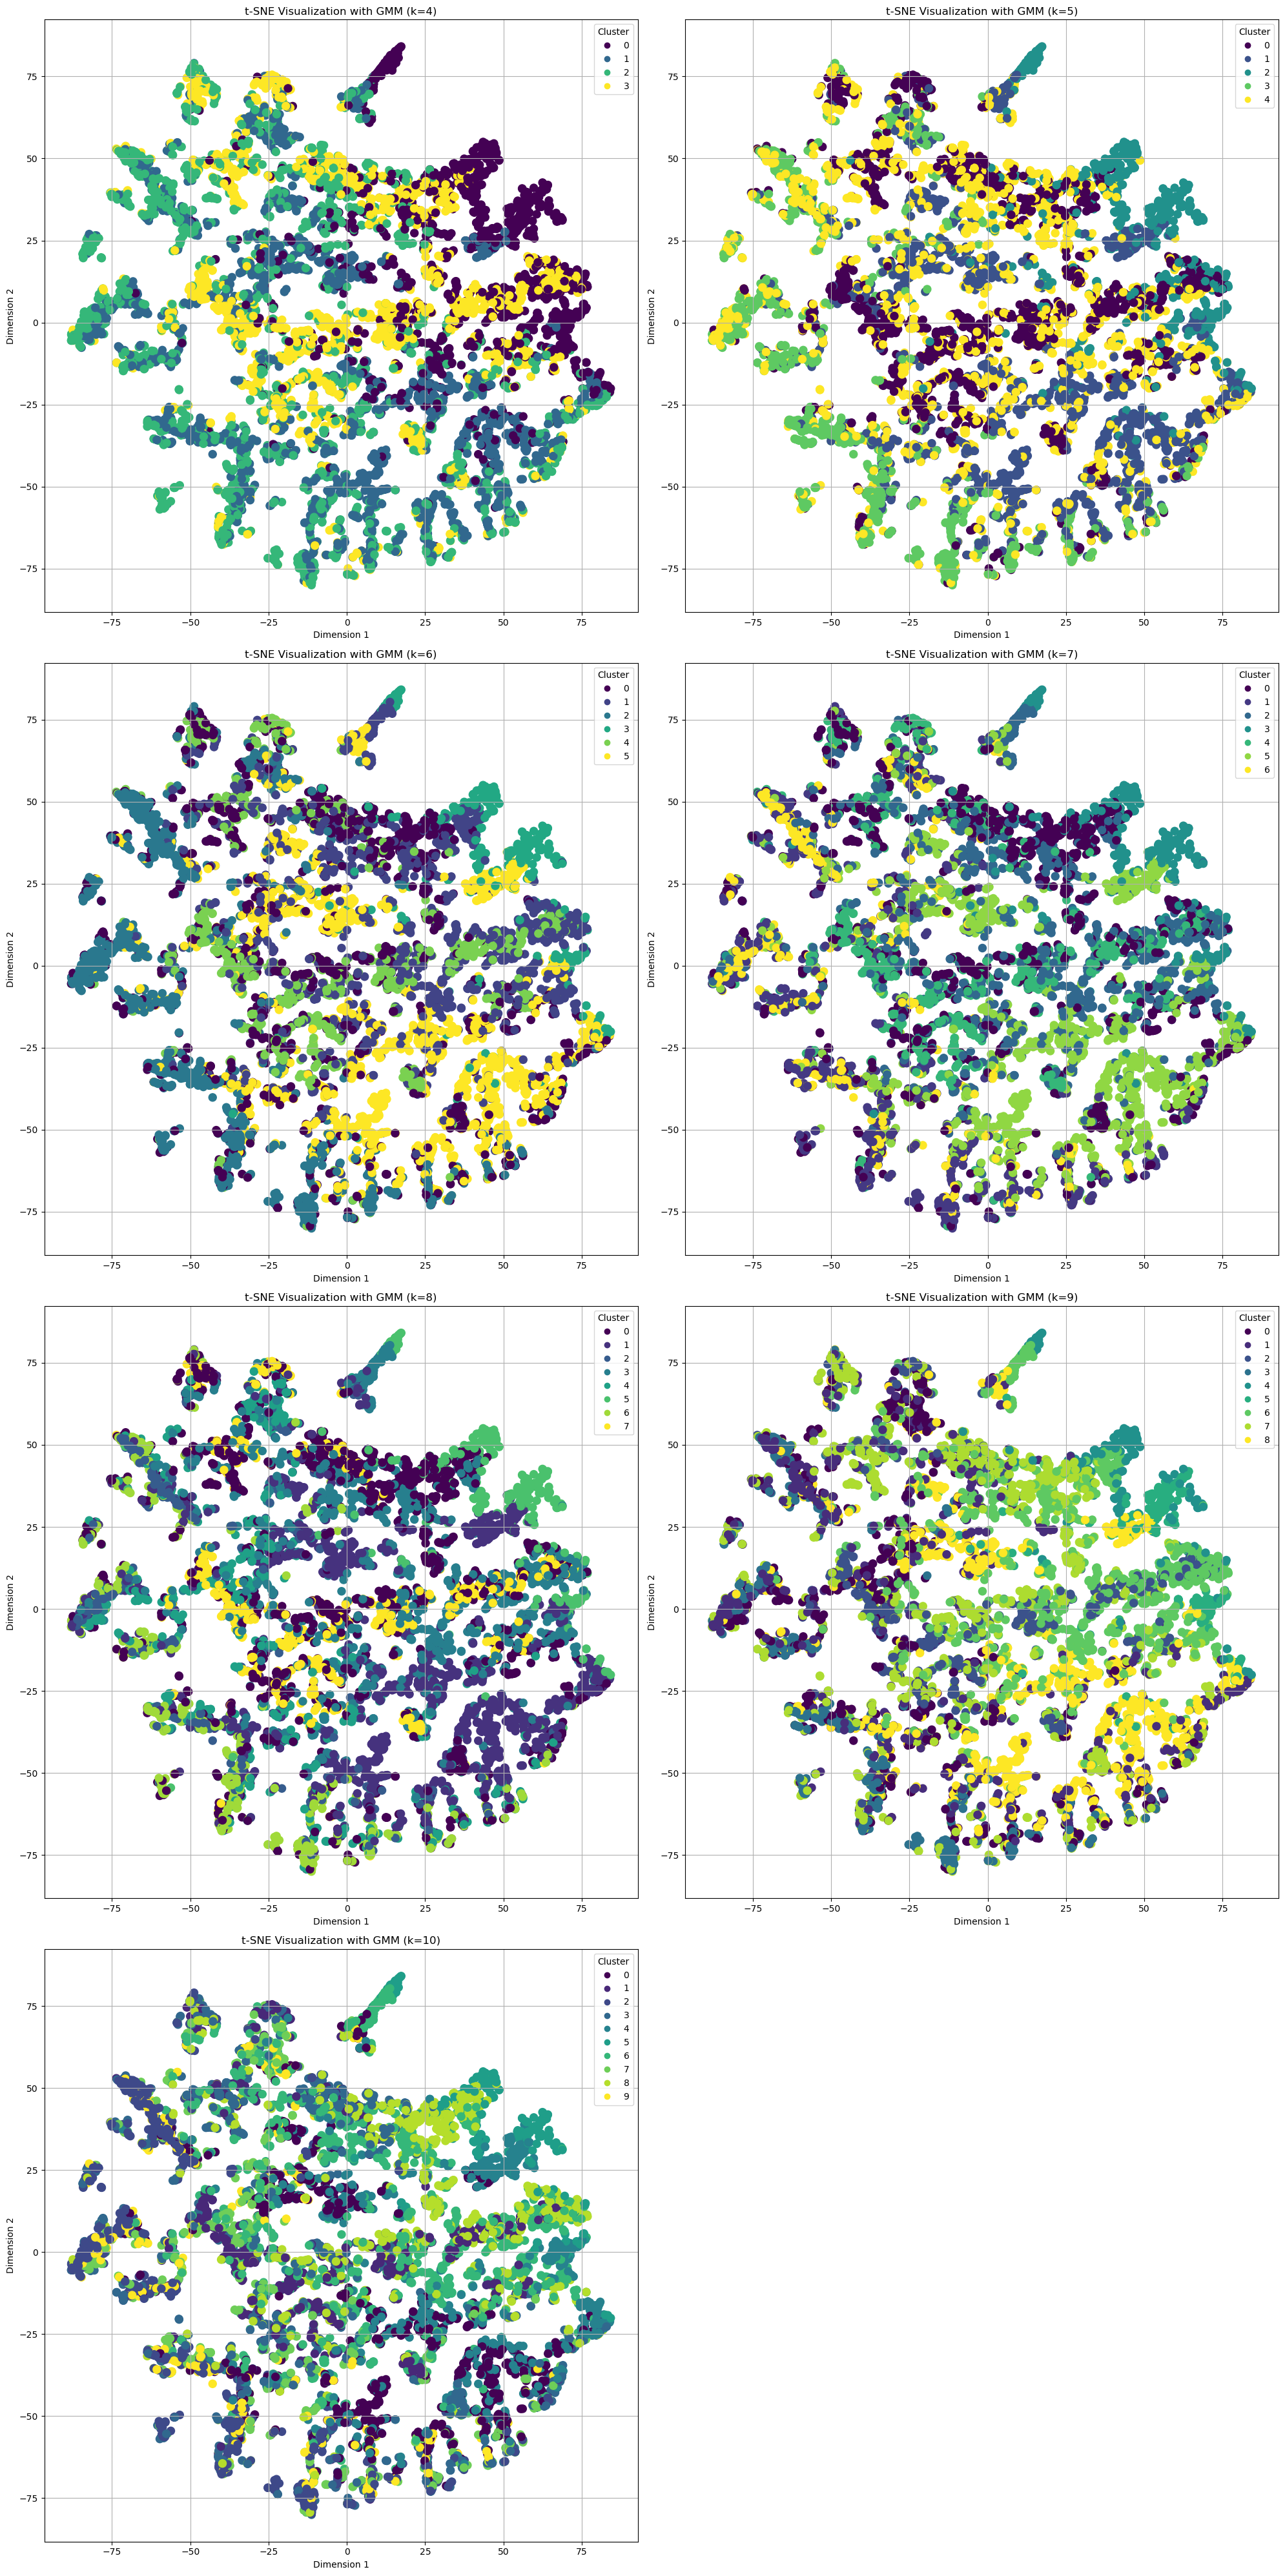

In [297]:
k_values = [4, 5, 6, 7, 8, 9, 10]
num_plots = len(k_values)
num_cols = 2  
num_rows = (num_plots + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10 * num_rows), tight_layout=True)
axes = axes.flatten()

for idx, k in enumerate(k_values):
    gmm = GaussianMixture(n_components=k, n_init=10, max_iter=1000, init_params='k-means++', random_state=42)
    cluster_labels = gmm.fit_predict(pca_final)

    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster'] = cluster_labels

    scatter = axes[idx].scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=df_tsne['Cluster'], s=75, cmap='viridis')
    axes[idx].set_title(f't-SNE Visualization with GMM (k={k})')
    axes[idx].set_xlabel('Dimension 1')
    axes[idx].set_ylabel('Dimension 2')
    axes[idx].grid(True)
    axes[idx].legend(*scatter.legend_elements(), title="Cluster")

for ax in axes[num_plots:]:
    ax.axis('off')

plt.show()

In [315]:
def compute_cluster_centroids_gmm(df, n_components=5, n_clusters=4, random_state=42):

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    pca = PCA(n_components=n_components)
    pca_final = pca.fit_transform(df_scaled)

    gmm = GaussianMixture(n_components=n_clusters, n_init=10, max_iter=1000, init_params='k-means++', random_state=random_state)
    cluster_labels_gmm = gmm.fit_predict(pca_final)

    df_pca = pd.DataFrame(pca_final, columns=[f'PC{i+1}' for i in range(n_components)])
    df_pca['Cluster Labels_gmm'] = cluster_labels_gmm
    combined_df = pd.concat([df, df_pca], axis=1)

    cluster_centroids_pca = gmm.means_

    cluster_centroids_scaled = pca.inverse_transform(cluster_centroids_pca)
    cluster_centroids_original = scaler.inverse_transform(cluster_centroids_scaled)

    df_cluster_centroids = pd.DataFrame(cluster_centroids_original, columns=df.columns)
    df_centroids_pca = pd.DataFrame(cluster_centroids_pca, columns=[f'PC{i+1}' for i in range(n_components)])
    df_cluster_centroids = pd.concat([df_cluster_centroids, df_centroids_pca], axis=1)
    df_cluster_centroids['Cluster Label_gmm'] = range(n_clusters)

    return combined_df, df_cluster_centroids

In [319]:
combined_df, cluster_centroids_df = compute_cluster_centroids_gmm(df, n_components=5, n_clusters=4, random_state=42)
cluster_centroids_df

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  3503.642304           0.980684  2815.690673       1767.639793   
1   890.701809           0.957503  1368.601125        750.678022   
2   427.483367           0.724005   474.172480        155.545407   
3  2222.504914           0.884168  -211.881381         11.132576   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             1048.388404   2674.205027             0.627216   
1              618.320199   -273.991257             0.775631   
2              319.061191    445.329218             0.399917   
3             -223.019173   1797.685293             0.150530   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.334655                          0.495890   
1                    0.327294                          0.603179   
2                    0.074245                          0.324400   
3                    0.103565                          0.024223   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.264282  ...  4631.502546       1963.466786   
1                0.030601  ...   868.307981        461.440145   
2                0.066874  ...  1172.715923        435.808080   
3                0.241491  ...  1183.162689       1003.463721   

   PRC_FULL_PAYMENT     TENURE       PC1       PC2       PC3       PC4  \
0          0.144512  11.650888  1.962494  1.830258  0.134502 -0.123653   
1          0.212861  11.723219  0.861434 -1.218932  0.484585  0.076356   
2          0.239842  11.217184 -0.774697 -0.862406 -0.397550 -0.277962   
3         -0.013017  11.526088 -1.631649  1.066791 -0.208988  0.337540   

        PC5  Cluster Label_gmm  
0 -0.156876                  0  
1  0.369676                  1  
2 -0.479961                  2  
3  0.254028                  3  

[4 rows x 23 columns]

In [321]:
combined_df, cluster_centroids_df = compute_cluster_centroids_gmm(df, n_components=5, n_clusters=5, random_state=42)
cluster_centroids_df

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  2260.937155           0.890029  -223.028506          4.178144   
1  1165.488461           0.977358  1897.623107       1241.735894   
2  4410.206770           0.984564  3732.124848       2330.801928   
3   145.124901           0.751277   394.225566        -98.283912   
4  1156.721913           0.820422   621.750455        316.843938   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             -227.217209   1791.259252             0.151264   
1              656.210945   -215.650237             0.770500   
2             1401.727292   3435.596419             0.648010   
3              493.085794   -196.691714             0.550410   
4              305.228141   1172.423439             0.434476   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.105252                          0.024047   
1                    0.400063                          0.561614   
2                    0.356323                          0.537368   
3                    0.068423                          0.495199   
4                    0.142487                          0.329298   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.241919  ...  1153.705134       1038.256027   
1                0.034052  ...  1413.578863        457.977158   
2                0.307056  ...  6170.400010       2742.950210   
3                0.005660  ...   504.603032        664.206637   
4                0.152947  ...  1621.760361        464.612783   

   PRC_FULL_PAYMENT     TENURE       PC1       PC2       PC3       PC4  \
0         -0.019472  11.548381 -1.631869  1.080863 -0.183629  0.370903   
1          0.199335  11.846236  1.285007 -0.990117  0.239840  0.231874   
2          0.144325  11.738555  2.837488  2.656449  0.046772 -0.084320   
3          0.262285  11.344074 -0.503789 -1.543443  0.099261 -0.181161   
4          0.194890  11.224674 -0.489701 -0.053796 -0.141068 -0.380235   

        PC5  Cluster Label_gmm  
0  0.269027                  0  
1  0.540467                  1  
2 -0.498408                  2  
3 -0.587200                  3  
4 -0.119479                  4  

[5 rows x 23 columns]

In [323]:
combined_df, cluster_centroids_df = compute_cluster_centroids_gmm(df, n_components=5, n_clusters=6, random_state=42)
cluster_centroids_df

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  1140.691933           0.747083   186.242163        311.961142   
1  2836.107274           1.013724   893.427630        431.229564   
2   -74.053578           0.739446   380.401880       -174.417811   
3  4287.139327           0.861188  5216.339615       3319.396878   
4  2306.539788           0.908721  -289.319400        -33.838507   
5  1079.203707           0.960304  1974.416680       1279.468373   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             -125.604414   1190.397327             0.142736   
1              462.425439   2265.468676             0.544015   
2              555.454840    -81.720248             0.598657   
3             1897.537615   3262.373328             0.677154   
4             -255.508020   1484.084905             0.153254   
5              695.299163   -209.911387             0.775272   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.091073                          0.019823   
1                    0.223486                          0.425694   
2                    0.060147                          0.553915   
3                    0.385363                          0.582912   
4                    0.111518                          0.020317   
5                    0.395058                          0.571418   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.158067  ...  1452.828767        343.936991   
1                0.275732  ...  2251.273253       1400.739193   
2                0.014968  ...   578.881741        427.352632   
3                0.232495  ...  7890.967542       3080.272715   
4                0.216505  ...   817.294117       1225.708916   
5                0.029639  ...  1536.179528        417.793927   

   PRC_FULL_PAYMENT     TENURE       PC1       PC2       PC3       PC4  \
0          0.115776  11.285228 -1.511195  0.205266 -0.887390  0.020606   
1          0.074643  11.510640  0.217751  1.318090  0.705470 -0.162591   
2          0.309931  11.162306 -0.439271 -1.623911  0.171458 -0.511496   
3          0.255000  11.770842  4.016722  2.439753 -0.720269 -0.079616   
4         -0.051840  11.721225 -1.660964  0.916592 -0.099458  0.654164   
5          0.218751  11.798966  1.340708 -1.037586  0.179111  0.155407   

        PC5  Cluster Label_gmm  
0 -0.051132                  0  
1  0.217560                  1  
2 -0.645161                  2  
3 -1.142596                  3  
4  0.322728                  4  
5  0.467230                  5  

[6 rows x 23 columns]

In [331]:
combined_df, cluster_centroids_df = compute_cluster_centroids_gmm(df, n_components=5, n_clusters=7, random_state=42)
cluster_centroids_df

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  1714.307202           0.772615   117.823798        221.302630   
1   237.485392           0.711359   405.717959         84.822666   
2  2440.713503           1.015587   932.367407        437.570673   
3  4159.011718           0.862777  4771.737497       2994.214936   
4  2232.547528           0.904603  -290.432293        -32.444845   
5  1044.352668           0.949257  2150.347999       1440.694340   
6    99.240139           0.900389   380.466919       -459.145581   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             -103.382644   2100.309674             0.120750   
1              321.361737   -160.788781             0.399939   
2              495.063536   1622.843301             0.609394   
3             1778.102146   3415.269890             0.657533   
4             -258.010118   1370.818460             0.155289   
5              709.994252   -176.482723             0.768760   
6              840.371532   -122.880201             0.937040   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.068215                          0.017257   
1                    0.059819                          0.329631   
2                    0.246574                          0.479837   
3                    0.351556                          0.572706   
4                    0.112185                          0.021107   
5                    0.411713                          0.555972   
6                    0.140569                          0.888371   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.245431  ...  2014.451970        535.625158   
1                0.005767  ...   690.698150        670.936611   
2                0.216657  ...  1780.151246       1274.089529   
3                0.257271  ...  7536.863270       2874.557536   
4                0.205434  ...   740.247179       1208.865483   
5                0.029726  ...  1767.918094        304.598666   
6                0.035536  ...    43.142000        445.260413   

   PRC_FULL_PAYMENT     TENURE       PC1       PC2       PC3       PC4  \
0          0.099130  11.131232 -1.542538  1.013180 -0.719797 -0.250256   
1          0.222704  11.416872 -0.837457 -1.337749 -0.384539  0.077715   
2          0.093635  11.610031  0.352036  0.709317  0.764435 -0.036816   
3          0.254041  11.629668  3.610212  2.477274 -0.591265 -0.269563   
4         -0.049708  11.739008 -1.666141  0.813263 -0.116876  0.687371   
5          0.232332  11.770278  1.449269 -1.010681  0.028173  0.107134   
6          0.338277  11.176474  0.384593 -1.823468  1.364848 -0.847428   

        PC5  Cluster Label_gmm  
0 -0.100366                  0  
1 -0.567734                  1  
2  0.274471                  2  
3 -1.091444                  3  
4  0.320829                  4  
5  0.482794                  5  
6 -0.325546                  6  

[7 rows x 23 columns]

In [333]:
combined_df, cluster_centroids_df = compute_cluster_centroids_gmm(df, n_components=5, n_clusters=8, random_state=42)
cluster_centroids_df

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  1665.625277           0.776207    73.102362        196.309225   
1   938.929525           0.920471  2237.474092       1501.052084   
2   -23.363358           0.882177   461.194189       -425.656802   
3  2567.737576           1.019261   923.689473        427.989932   
4  1136.280099           0.941278   272.834368        102.967924   
5  4549.928541           0.874160  5105.381873       3219.699106   
6  -208.712292           0.632727   485.389143         -4.166975   
7  2366.745026           0.909419  -318.101832        -61.504467   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0             -123.115379   1908.645734             0.121448   
1              736.784649   -105.120962             0.754947   
2              887.643367    -40.789124             0.951230   
3              495.960048   1764.440219             0.598308   
4              170.108658   -289.039160             0.529720   
5             1886.264916   3722.845638             0.661712   
6              490.182984   -140.466408             0.429107   
7             -256.624084   1527.800573             0.145646   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.070000                          0.014852   
1                    0.401835                          0.547982   
2                    0.136751                          0.908003   
3                    0.240933                          0.472559   
4                    0.212372                          0.378616   
5                    0.368313                          0.578432   
6                    0.000530                          0.401603   
7                    0.104247                          0.016772   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.228939  ...  1817.564425        574.474994   
1                0.029809  ...  1983.073102        218.265823   
2                0.038753  ...   222.620688        316.062401   
3                0.229633  ...  1875.140525       1355.271293   
4                0.044619  ...  -141.319010        885.518405   
5                0.278450  ...  8095.968282       3149.386096   
6               -0.013323  ...   968.377115        576.335044   
7                0.220140  ...   824.100554       1298.007636   

   PRC_FULL_PAYMENT     TENURE       PC1       PC2       PC3       PC4  \
0          0.089031  11.200232 -1.577434  0.876125 -0.701044 -0.131581   
1          0.256520  11.686387  1.463979 -1.012599 -0.113050 -0.010272   
2          0.369490  11.070856  0.456838 -1.846834  1.310653 -1.028395   
3          0.085208  11.607160  0.337234  0.856132  0.781920 -0.038457   
4          0.077159  11.905454 -0.496842 -0.971244  0.432607  0.652560   
5          0.245072  11.679090  3.928653  2.837690 -0.617211 -0.230650   
6          0.309359  11.169434 -0.774471 -1.623178 -0.481881 -0.309738   
7         -0.058476  11.731371 -1.690839  0.969098 -0.080115  0.676995   

        PC5  Cluster Label_gmm  
0 -0.076461                  0  
1  0.387763                  1  
2 -0.392841                  2  
3  0.255923                  3  
4  0.365151                  4  
5 -1.157759                  5  
6 -0.987229                  6  
7  0.298214                  7  

[8 rows x 23 columns]

In [335]:
combined_df, cluster_centroids_df = compute_cluster_centroids_gmm(df, n_components=5, n_clusters=9, random_state=42)
cluster_centroids_df

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  1121.011997           0.939982   224.484390         28.814972   
1   247.189682           0.750161   617.384884        199.913709   
2  2407.671301           0.911715  -312.964015        -59.322767   
3  -194.325680           0.701846   448.095300       -179.095603   
4  5169.679103           0.855031  3273.303895       1646.771007   
5  2689.059809           0.946289  6519.360354       4662.121412   
6  3142.811992           1.029876   954.925121        504.327238   
7  1325.964868           0.755078   -20.248230        136.901756   
8   994.514391           0.978685  2155.795556       1372.891082   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              195.938445   -284.452535             0.542738   
1              417.950349    340.291605             0.507134   
2             -253.669335   1534.787851             0.143912   
3              627.890101   -179.149051             0.591066   
4             1627.178805   4893.719480             0.475867   
5             1857.662499    665.108742             0.960237   
6              450.785423   2527.959833             0.518682   
7             -157.040852   1488.917699             0.121206   
8              783.285895   -249.382812             0.851591   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.200197                          0.400845   
1                    0.112736                          0.421719   
2                    0.103810                          0.015676   
3                    0.030511                          0.565985   
4                    0.088924                          0.527891   
5                    0.753943                          0.656693   
6                    0.230789                          0.396832   
7                    0.062688                          0.012907   
8                    0.428349                          0.638945   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.043810  ...  -186.709414        938.390785   
1                0.061117  ...  1132.713384        192.236185   
2                0.220566  ...   831.669066       1344.479326   
3               -0.006251  ...   677.334212        558.761486   
4                0.396611  ...  7219.972600       4110.341438   
5                0.020576  ...  6917.274492       1209.514661   
6                0.301495  ...  2486.055369       1542.661149   
7                0.188911  ...  1454.051820        459.863160   
8                0.027265  ...  1617.945387        263.076779   

   PRC_FULL_PAYMENT     TENURE       PC1       PC2       PC3       PC4  \
0          0.082044  11.890084 -0.503335 -1.001909  0.507188  0.621101   
1          0.279777  11.151158 -0.444264 -1.071795 -0.208532 -0.492167   
2         -0.063153  11.749051 -1.684182  0.991744 -0.070303  0.705331   
3          0.330019  11.149909 -0.418288 -1.768853  0.086838 -0.505774   
4          0.144188  11.427862  2.206933  3.743206  0.152253 -0.392365   
5          0.345548  12.203297  5.429918  0.265354 -1.272507  0.341180   
6          0.049715  11.544933  0.247207  1.644802  0.696787 -0.107894   
7          0.099744  11.233726 -1.692697  0.464894 -0.766245 -0.045772   
8          0.248125  11.757948  1.641767 -1.141935  0.282800  0.006367   

        PC5  Cluster Label_gmm  
0  0.308711                  0  
1 -0.375439                  1  
2  0.293191                  2  
3 -0.867192                  3  
4 -1.759780                  4  
5  0.183775                  5  
6  0.253596                  6  
7 -0.091106                  7  
8  0.536935                  8  

[9 rows x 23 columns]

In [336]:
combined_df, cluster_centroids_df = compute_cluster_centroids_gmm(df, n_components=5, n_clusters=10, random_state=42)
cluster_centroids_df

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0   900.333544           0.994585  2017.493518       1288.065187   
1  2330.606063           0.908201  -318.559335        -59.321874   
2  -447.640730           0.637656   430.410397       -103.305077   
3   980.122352           0.724936    71.094013        224.651083   
4  1421.664271           0.907533  2826.192714       1962.342279   
5  5546.691282           0.900803  5875.869092       3639.752570   
6  2567.901758           1.022408   810.241600        332.471965   
7  1185.824548           0.930429   255.440618        157.313106   
8  2722.071268           0.842109   126.215032        178.883168   
9   308.220517           0.924481   486.092846       -400.628772   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              729.790220   -344.107300             0.866533   
1             -259.262970   1438.417476             0.146411   
2              534.387122     20.313454             0.499036   
3             -153.423765    781.877465             0.115705   
4              864.197996    216.499987             0.712869   
5             2236.773985   4308.746289             0.699173   
6              478.032409   1824.783410             0.598233   
7               98.323937   -260.164365             0.474446   
8              -52.622787   3392.683776             0.114877   
9              887.481028   -268.340954             0.955462   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.437239                          0.645461   
1                    0.105269                          0.016341   
2                    0.006237                          0.474360   
3                    0.066247                          0.000897   
4                    0.425582                          0.502557   
5                    0.381234                          0.642513   
6                    0.230399                          0.477372   
7                    0.210050                          0.316918   
8                    0.064967                          0.026864   
9                    0.154054                          0.904578   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.026398  ...  1353.186285        120.052774   
1                0.211572  ...   760.013337       1306.897063   
2                0.006293  ...   979.622065        201.451421   
3                0.115479  ...  1099.102953        512.837975   
4                0.043069  ...  2896.887954        595.033040   
5                0.308239  ...  9301.641146       4166.518341   
6                0.237619  ...  1794.256073       1344.453589   
7                0.047428  ...   -93.291961        883.016882   
8                0.373641  ...  2836.095929        905.122842   
9                0.020933  ...    -7.349179        750.067423   

   PRC_FULL_PAYMENT     TENURE       PC1       PC2       PC3       PC4  \
0          0.244778  11.751983  1.557411 -1.239065  0.366505 -0.012109   
1         -0.059935  11.756890 -1.692871  0.898432 -0.087203  0.721405   
2          0.360660  10.949668 -0.696868 -1.685969 -0.336893 -0.727416   
3          0.101442  11.409430 -1.673517 -0.117312 -0.937572  0.277322   
4          0.243136  11.792052  1.880562 -0.558681 -0.402921  0.153180   
5          0.217047  11.890941  4.754852  3.569743 -0.504180  0.000135   
6          0.083770  11.575567  0.250540  0.885354  0.847008 -0.085808   
7          0.059869  11.932208 -0.633837 -0.877271  0.271709  0.746486   
8          0.056191  11.005747 -1.418059  2.248947 -0.386715 -0.529244   
9          0.309917  11.349708  0.547210 -1.832663  1.468853 -0.596140   

        PC5  Cluster Label_gmm  
0  0.655566                  0  
1  0.299573                  1  
2 -0.943389                  2  
3 -0.152725                  3  
4  0.250684                  4  
5 -1.496983                  5  
6  0.255080                  6  
7  0.389909         

# GMM Clustering Summary and Interpretation

#### k = 4

- **Cluster 0:** 
  - Predominantly low balance, high purchase frequency, and moderate cash advance. High purchases frequency with a low percentage of full payments.
- **Cluster 1:** 
  - Higher balance, significant one-off purchases, and cash advance with moderate purchase frequency. Higher full payment percentage.
- **Cluster 2:** 
  - Very high balance, high one-off and installment purchases, and high cash advances. High percentage of full payments.
- **Cluster 3:** 
  - Low balance, low purchases, and cash advances. Predominantly negative or very low values for many features.

The clusters show a range from low balance, frequent small transactions to high balance, large one-off purchases, and significant cash advances. This clustering indicates a clear differentiation between high and low activity customers.

#### k = 5

- **Cluster 0:** 
  - Low balance, high frequency of small purchases, low percentage of full payments.  
- **Cluster 1:** 
  - Moderate to high balance, significant one-off and installment purchases, high percentage of full payments.  
- **Cluster 2:** 
  - Very high balance with a mix of large purchases and cash advances. High percentage of full payments. 
- **Cluster 3:** 
  - Low balance, moderate purchases, high cash advances.
- **Cluster 4:** 
  - Moderate balance, low to moderate purchases, and high cash advances with low percentage of full payments.

This clustering provides a more nuanced view, segmenting customers based on balance and their spending patterns, including their payment behavior.

#### k = 6

- **Cluster 0:** 
  - Low balance with high frequency of small purchases and cash advances. Low full payment percentage.  
- **Cluster 1:** 
  - Moderate balance, high one-off and installment purchases, moderate cash advances, high percentage of full payments.
- **Cluster 2:** 
  - High balance with high overall purchases, especially large transactions and cash advances.
- **Cluster 3:** 
  - Low balance, moderate purchases, significant cash advances, and low full payment percentage.
- **Cluster 4:** 
  - Moderate to high balance, moderate cash advances, and high percentage of full payments. 
- **Cluster 5:** 
  - Very high balance, extensive purchases and cash advances, high percentage of full payments.

This level of clustering identifies specific behavior patterns, such as high balance with large transactions and frequent cash advances versus lower balance with smaller transactions.

#### k = 7

- **Cluster 0:** 
  - Low balance, low frequency of purchases, high cash advances, and low full payment percentage.  
- **Cluster 1:** 
  - Moderate to high balance, significant one-off purchases and cash advances, moderate full payment percentage. 
- **Cluster 2:** 
  - High balance, very high one-off purchases and cash advances, high full payment percentage.
- **Cluster 3:** 
  - Low balance, moderate purchases and cash advances, high percentage of full payments. 
- **Cluster 4:** 
  - Moderate balance, low purchases, high cash advances. 
- **Cluster 5:** 
  - Very high balance with high transactions and cash advances, high full payment percentage. 
- **Cluster 6:** 
  - Low balance with very high frequency of purchases and moderate cash advances.

The increased number of clusters captures more detailed patterns, such as different levels of cash advance usage and spending frequencies.

#### k = 8

- **Cluster 0:** 
  - Low balance with high frequency of small transactions and cash advances, low full payment percentage.  
- **Cluster 1:** 
  - Moderate balance, high one-off purchases, moderate cash advances. 
- **Cluster 2:** 
  - Very high balance with high overall spending and significant cash advances. 
- **Cluster 3:** 
  - Low balance with moderate spending and significant cash advances, high full payment percentage.
- **Cluster 4:** 
  - Moderate balance, low purchases and high cash advances.
- **Cluster 5:** 
  - Very high balance with high spending, especially large transactions and high full payment percentage. 
- **Cluster 6:** 
  - Moderate balance with moderate spending and cash advances.
- **Cluster 7:** 
  - Low balance with high purchase frequency and cash advances, moderate full payment percentage.

More granular segmentation of customer behaviors, distinguishing between various levels of cash advances, spending patterns, and payment behaviors.

#### k = 9

- **Cluster 0:** 
  - Low balance with frequent small purchases and high cash advances, low full payment percentage. 
- **Cluster 1:** 
  - Moderate balance with high one-off purchases and cash advances, moderate full payment percentage.
- **Cluster 2:** 
  - Very high balance with high spending and cash advances, high full payment percentage.
- **Cluster 3:** 
  - Low balance with moderate transactions and high cash advances.
- **Cluster 4:** 
  - Moderate balance with high purchases and cash advances. 
- **Cluster 5:** 
  - High balance with extensive transactions and high full payment percentage.
- **Cluster 6:** 
  - Low balance with very high frequency of small transactions and moderate cash advances.
- **Cluster 7:** 
  - Moderate to high balance, low purchases, high cash advances.
- **Cluster 8:** 
  - Very high balance with high purchases and significant cash advances.

Very detailed clustering that provides insights into specific transaction behaviors and payment patterns, further differentiating between various spending and payment habits.

#### k = 10

- **Cluster 0:** 
  - Low balance, high frequency of small transactions, and cash advances with a low full payment percentage.
- **Cluster 1:** 
  - Moderate balance, high one-off purchases, moderate cash advances, moderate full payment percentage.
- **Cluster 2:** 
  - High balance with significant transactions and cash advances, high full payment percentage.
- **Cluster 3:** 
  - Low balance with moderate transactions and high cash advances.
- **Cluster 4:** 
  - Moderate balance with high purchases, low cash advances.
- **Cluster 5:** 
  - Very high balance with extensive spending and high full payment percentage.
- **Cluster 6:** 
  - Moderate balance with high purchases and cash advances.
- **Cluster 7:** 
  - Low balance, very high transaction frequency and cash advances.
- **Cluster 8:** 
  - Very high balance with high overall transactions and cash advances.
- **Cluster 9:** 
  - Moderate to high balance with low purchases, high cash advances.

The highest level of granularity captures very specific behaviors, such as exact spending patterns, cash advance usage, and payment behaviors, providing the most detailed segmentation.

**Overall Interpretation:** 

As the number of clusters increases, the segmentation becomes more refined, capturing more detailed customer behaviors and transaction patterns. Each clustering level provides increasing granularity, helping to better understand different customer segments and tailor strategies accordingly.


### Comparison of Clustering Methods: K-Means vs Gaussian Mixture Models (GMMs)

#### k = 4

- **K-Means Clustering:**
This approach groups customers by distinct activity levels, from frequent small transactions to high-value purchases and cash advances.

- **GMM Clustering:**
GMM provides a softer boundary between clusters, focusing on the probability distributions and capturing variations within similar activity levels.

#### k = 5

- **K-Means Clustering:**
K-Means differentiates more clearly between activity levels and balance, creating distinct clusters based on spending and cash advance patterns.

- **GMM Clustering:**
GMM clusters may overlap more, reflecting different probabilities of belonging to each cluster, which helps in capturing nuanced spending behaviors.

#### k = 6

- **K-Means Clustering:**
K-Means identifies distinct customer segments with clear boundaries, emphasizing high spenders and high balance individuals.

- **GMM Clustering:**
GMMs offer a probabilistic view that can capture more subtle variations in spending and balance within similar categories.

#### k = 7

- **K-Means Clustering:**
K-Means provides fine distinctions between spending levels and balance, optimizing for clear-cut clusters.

- **GMM Clustering:**
GMM clusters might show more overlap and reflect varying degrees of membership probability, capturing more subtle differences in behavior.

#### k = 8

- **K-Means Clustering:**
K-Means further refines segmentation with clear boundaries, distinguishing between various levels of spending and balance.

- **GMM Clustering:**
GMM captures more nuanced behaviors by reflecting the probability of membership in each cluster, which may result in overlapping categories.

#### k = 9

- **K-Means Clustering:**
K-Means provides a highly detailed segmentation with clearly defined clusters.

- **GMM Clustering:**
GMM achieves a very detailed level of segmentation, allowing for nuanced analysis of customer behaviors.

### Summary

- **K-Means Clustering** provides **clear, distinct boundaries** between clusters, making it suitable for straightforward segmentation and when we need clearly defined groups.
  
- **Gaussian Mixture Models (GMMs)** offer a **probabilistic approach**, allowing for overlap and capturing more subtle variations within clusters, making it useful for nuanced segmentation and understanding the probability distribution of customer behaviors.

Each method has its strengths, with K-Means focusing on crisp cluster assignments and GMMs on probabilistic membership, allowing for a deeper understanding of the data's distribution and customer behavior.
